<h1 style="text-align: center; color: darkgreen;">
Data-Driven Strategy for Launching a New Credit Card
</h1>

<h1 style="color:#1f77b4", align = "Center">Problem Statement</h1>



The Indian credit card market is highly competitive, dominated by well-established banks with strong brand presence and customer loyalty.  
A new bank planning to launch its first credit card aims to create a distinctive position in this crowded landscape.

The goal of this project is to leverage <b>data-driven insights</b> to:

1. Identify potential customer segments likely to adopt the new credit card.  
2. Understand customer preferences, behaviors, and spending patterns.  
3. Develop strategies for <b>customer acquisition</b> and <b>retention</b>.  
4. Position the new credit card as a <b>preferred choice</b> in India’s competitive market.

By analyzing historical data, market trends, and customer behavior, this project seeks to provide actionable recommendations to ensure a successful credit card launch and establish a strong foothold for the new bank.

---


<h1 style="color:#1f77b4", , align = "Center">Data Import</h1>

The first step in this project involves importing the necessary libraries and datasets required for the analysis.  
This includes Python libraries for **data manipulation, visualization, and statistical analysis**.

Below are the primary libraries used:

- **pandas** → For loading and manipulating structured data  
- **numpy** → For numerical operations  
- **matplotlib** & **seaborn** → For data visualization  

The dataset used in this project contains customer-level information such as demographics, income, spending patterns, and card preferences.  
This data will be used to derive insights that support the new credit card launch strategy.

---


In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  importing the datasets required for the analysis
df_customer = pd.read_csv("customers.csv")
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married


In [3]:
df_credit_profile = pd.read_csv("credit_profiles.csv")
df_credit_profile.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [4]:
df_transactions = pd.read_csv("transactions.csv")
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


<h1 style="color:#1f77b4" , align = "Center">Data Exploration and Cleaning</h1>

This section focuses on exploring the dataset to understand its structure, quality, and key characteristics, followed by cleaning operations to ensure data reliability.

The process involves:

1. Reviewing dataset shape, column names, and data types.  
2. Identifying and handling **missing values** and **duplicates**.  
3. Checking for **inconsistent or outlier values**.  
4. Correcting **data types** where necessary.  
5. Generating **summary statistics** to understand data distribution.  
6. Performing **basic visual exploration** to uncover patterns or anomalies.

A clean and well-understood dataset forms the foundation for accurate analysis and modeling.


<h1 style="color:#1f77b4" , align = "Center">Exploration of customer table</h1>
<br><br>

In [5]:
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married


In [6]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cust_id         1000 non-null   int64  
 1   name            1000 non-null   object 
 2   gender          1000 non-null   object 
 3   age             1000 non-null   int64  
 4   location        1000 non-null   object 
 5   occupation      1000 non-null   object 
 6   annual_income   950 non-null    float64
 7   marital_status  1000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB



<h2 style="color:#1f77b4">Data Quality Check - Annual Income</h2>

- Annual income has **50 missing values** (5% of dataset). With only 1000 customers, dropping these records would result in significant data loss.

- Before treating missing values, we need to check for outliers in annual_income as they can distort imputation methods and may represent legitimate high-value customer segments rather than data errors.

----------

In [7]:
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


<h2 style="color:#1f77b4">Data Quality Issues</h2>

**Critical Errors Found:**
- **Age:** Min = 1 year, Max = 135 years (Unrealistic for credit card holders)
- **Annual Income:** Min = $2 (Impossible for card eligibility)

<h2 style="color:#1f77b4">Missing Value Treatment Strategy</h2>

**Approach:** Use **median imputation** (robust against outliers) instead of mean due to income data anomalies.

**Smart Imputation:** Apply **group-based median** by `location` and `occupation` rather than global median, as income varies significantly across geographical regions and job roles.

**Business Logic:** Professionals in CITY will have different income patterns than those in smaller suburbs - group-wise imputation ensures more accurate customer profiling.

In [8]:
# Quick view of data
df_customer.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married


In [9]:
df_customer['annual_income'] = df_customer['annual_income']*80           # $ to Rupee conversion

In [10]:
# Quick view of all the missing values 
df_customer[df_customer.annual_income.isnull()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,NaN,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,NaN,Single
97,98,Sia Batra,Male,47,Suburb,Business Owner,NaN,Married
102,103,Pooja Ganguly,Male,32,City,Data Scientist,NaN,Married
155,156,Krishna Trivedi,Male,24,City,Fullstack Developer,NaN,Married
170,171,Advait Kulkarni,Male,52,City,Business Owner,NaN,Single
186,187,Aanya Pande,Male,53,City,Consultant,NaN,Single
192,193,Mira Naidu,Male,37,Suburb,Data Scientist,NaN,Married
227,228,Mihika Batra,Male,48,City,Business Owner,NaN,Married
232,233,Aaditya Rathore,Male,26,City,Freelancer,NaN,Married


In [11]:
# calculated group wise median values
df_med_salary = df_customer.groupby(['location', 'occupation'])['annual_income'].mean().reset_index().round(2)
df_med_salary

,location,occupation,annual_income
0,City,Accountant,5389984.00
1,City,Artist,3627114.29
2,City,Business Owner,21435316.99
3,City,Consultant,4447547.76
4,City,Data Scientist,10843631.33
5,City,Freelancer,6050560.51
6,City,Fullstack Developer,6233688.08
7,Rural,Accountant,4429720.00
8,Rural,Artist,2754346.67
9,Rural,Business Owner,20872354.29


In [12]:
# Trying how can i access single value
df_med_salary[(df_med_salary["location"] == "City") & (df_med_salary["occupation"] == "Business Owner")]["annual_income"]

2    21435316.99
Name: annual_income, dtype: float64

In [13]:
# imputing appropiate missing values
df_customer['annual_income'] = df_customer.apply(
    lambda row: (
        df_med_salary.loc[
            (df_med_salary["location"] == row["location"]) &
            (df_med_salary["occupation"] == row["occupation"]),
            "annual_income"
        ].values[0]
        if pd.isna(row["annual_income"]) else row["annual_income"]
    ),
    axis=1
)

In [14]:
# Quick Validation
df_customer.iloc[14]

cust_id                   15
name              Isha Arora
gender                Female
age                       25
location               Rural
occupation            Artist
annual_income     2754346.67
marital_status       Married
Name: 14, dtype: object

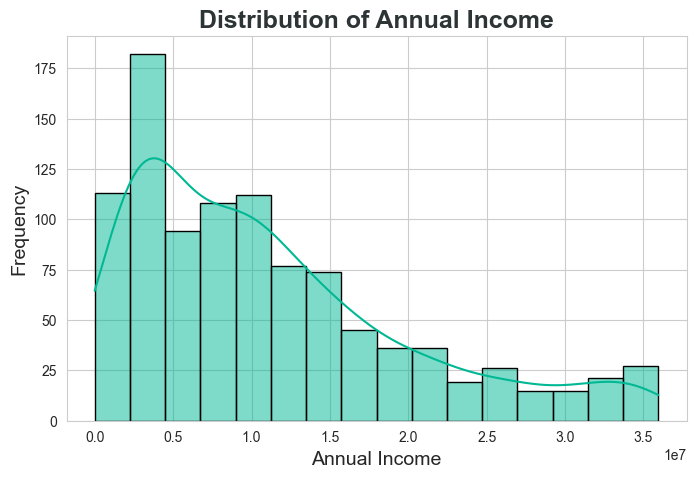

In [15]:
# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Create histogram
sns.histplot(df_customer['annual_income'], 
             kde=True, 
             color="#00b894", 
             edgecolor="black")

# Add titles and labels
plt.title("Distribution of Annual Income", fontsize=18, fontweight='bold', color="#2d3436")
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show plot
plt.show()

<h2 style="color:#1f77b4">Outlier Treatment - Annual Income</h2>

**Business Rule:** Customers with income < ₹80K are likely **data errors** (minimum credit card eligibility is typically ₹2-3L annually in India).

**Treatment Strategy:** Replace outliers with **group-wise median** based on `location` + `occupation` instead of dropping records to preserve dataset size for segmentation analysis.

In [16]:
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1.000000e+03
mean,500.500000,36.405000,1.112649e+07
std,288.819436,15.666155,8.875418e+06
min,1.000000,1.000000,1.600000e+02
25%,250.750000,26.000000,3.913900e+06
50%,500.500000,32.000000,9.073280e+06
75%,750.250000,46.000000,1.540912e+07
max,1000.000000,135.000000,3.594768e+07


In [17]:
#showing the outlier
outliers_annual_income = df_customer[df_customer['annual_income'] < 1000]
outliers_annual_income

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
543,544,Gauri Gupta,Male,54,City,Consultant,160.0,Married
633,634,Aradhya Pandey,Male,26,City,Data Scientist,160.0,Married
686,687,Gauri Nanda,Male,40,City,Business Owner,160.0,Married


In [18]:
# replacing the outliers with appropriate values 
for index, row in df_customer.iterrows():
    if df_customer.at[index,'annual_income'] < 1000:
        df_customer.at[index,'annual_income'] = df_med_salary.loc[(df_med_salary["location"] == row["location"]) &(df_med_salary["occupation"] == row["occupation"]),"annual_income"].values[0]


In [19]:
# quick validation 
df_customer.iloc[31]['annual_income']

np.float64(4000.0)

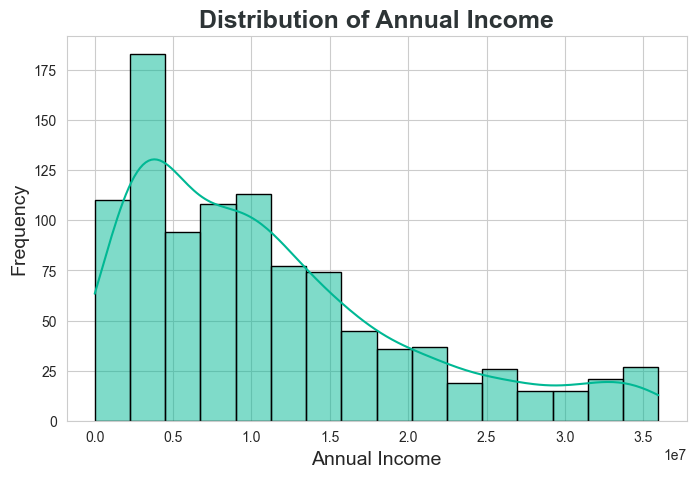

In [20]:
# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Create histogram
sns.histplot(df_customer['annual_income'], 
             kde=True, 
             color="#00b894", 
             edgecolor="black")

# Add titles and labels
plt.title("Distribution of Annual Income", fontsize=18, fontweight='bold', color="#2d3436")
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show plot
plt.show()

<h2 style="color:#1f77b4">Outlier Treatment - Age</h2>

**Business Rule:** Ages <18 years (below legal eligibility) and >85 years (unlikely active users) are potential **data errors**.

**Treatment Strategy:** Replace outliers with **occupation-wise median** (location less relevant for age patterns compared to profession demographics).

In [21]:
# calculating group-wise median salary 

occupation_by_med_age = df_customer.groupby('occupation')['age'].median().reset_index().round(0)
occupation_by_med_age

,occupation,age
0,Accountant,32.0
1,Artist,26.0
2,Business Owner,51.0
3,Consultant,46.0
4,Data Scientist,32.0
5,Freelancer,24.0
6,Fullstack Developer,28.0


In [22]:
occupation_by_med_age.index

RangeIndex(start=0, stop=7, step=1)

In [23]:
occupation_by_med_age.values

array([['Accountant', 32.0],
       ['Artist', 26.0],
       ['Business Owner', 51.0],
       ['Consultant', 46.0],
       ['Data Scientist', 32.0],
       ['Freelancer', 24.0],
       ['Fullstack Developer', 28.0]], dtype=object)

In [24]:
# checking for outliers 

outlier_age = df_customer[(df_customer['age'] > 85) | (df_customer['age'] <18)]
outlier_age

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,28656880.0,Married
41,42,Manya Thakur,Male,110,City,Artist,609680.0,Married
165,166,Swara Mehtani,Female,1,City,Freelancer,3177680.0,Single
174,175,Sneha Jaiswal,Male,110,City,Freelancer,1897840.0,Married
222,223,Aaryan Bajaj,Male,110,Suburb,Freelancer,16878960.0,Married
277,278,Amaira Dewan,Male,110,City,Consultant,7721760.0,Single
295,296,Veer Anand,Male,1,Rural,Accountant,4420320.0,Married
325,326,Yash Chatterjee,Male,110,City,Accountant,4881680.0,Single
610,611,Advait Mangal,Male,135,Rural,Business Owner,35582080.0,Married
692,693,Aarohi Dubey,Male,1,City,Business Owner,6643600.0,Married


In [25]:
# replacing outlier with appropriate values

for index, row in outlier_age.iterrows():
    df_customer.at[index, 'age'] = occupation_by_med_age.loc[occupation_by_med_age["occupation"]==row["occupation"], "age"].values[0]

In [26]:
# Quick Quality Check

df_customer.iloc[[0, 174]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,51,City,Business Owner,28656880.0,Married
174,175,Sneha Jaiswal,Male,24,City,Freelancer,1897840.0,Married


<h2 style="color:#1f77b4">Data Transformation - Age Groups</h2>

**Segmentation Strategy:** Creating **3 targeted age groups** based on credit card usage patterns and financial behavior:

- **Youngsters (18-25):** Early career, building credit history
- **Mid-age Professionals (26-48):** Peak earning phase, diverse spending needs  
- **Seniors (49-65):** Established income, different spending priorities

**Business Rationale:** Age-based segmentation enables **targeted product positioning** - younger customers prefer digital features while professionals focus on rewards and seniors prioritize security.

In [27]:
df_customer.age.describe()

count    1000.000000
mean       35.544000
std        12.275372
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

In [28]:
bins = [18, 25, 48, 65]
labels = ["Youngsters", "Mid-age Professionals", "Seniors"]

df_customer['age_group'] = pd.cut(df_customer['age'], bins, labels=labels, include_lowest = True)
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,51,City,Business Owner,28656880.0,Married,Seniors
1,2,Kabir Thakur,Female,47,City,Consultant,5213760.0,Single,Mid-age Professionals
2,3,Kriti Mangal,Male,21,City,Freelancer,1790240.0,Married,Youngsters
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,2685040.0,Married,Youngsters
4,5,Aarohi Negi,Male,48,City,Consultant,3152480.0,Married,Mid-age Professionals


In [29]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   cust_id         1000 non-null   int64   
 1   name            1000 non-null   object  
 2   gender          1000 non-null   object  
 3   age             1000 non-null   int64   
 4   location        1000 non-null   object  
 5   occupation      1000 non-null   object  
 6   annual_income   1000 non-null   float64 
 7   marital_status  1000 non-null   object  
 8   age_group       1000 non-null   category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 63.7+ KB


In [30]:
age_count = df_customer["age_group"].value_counts()
age_count

age_group
Mid-age Professionals    567
Youngsters               246
Seniors                  187
Name: count, dtype: int64

In [31]:
city_gender_count = df_customer.groupby(['location','gender'])['cust_id'].count().reset_index()
city_gender_count

,location,gender,cust_id
0,City,Female,226
1,City,Male,457
2,Rural,Female,26
3,Rural,Male,59
4,Suburb,Female,74
5,Suburb,Male,158


In [32]:
pivot_df = city_gender_count.pivot(index='location', columns='gender', values='cust_id')
pivot_df

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


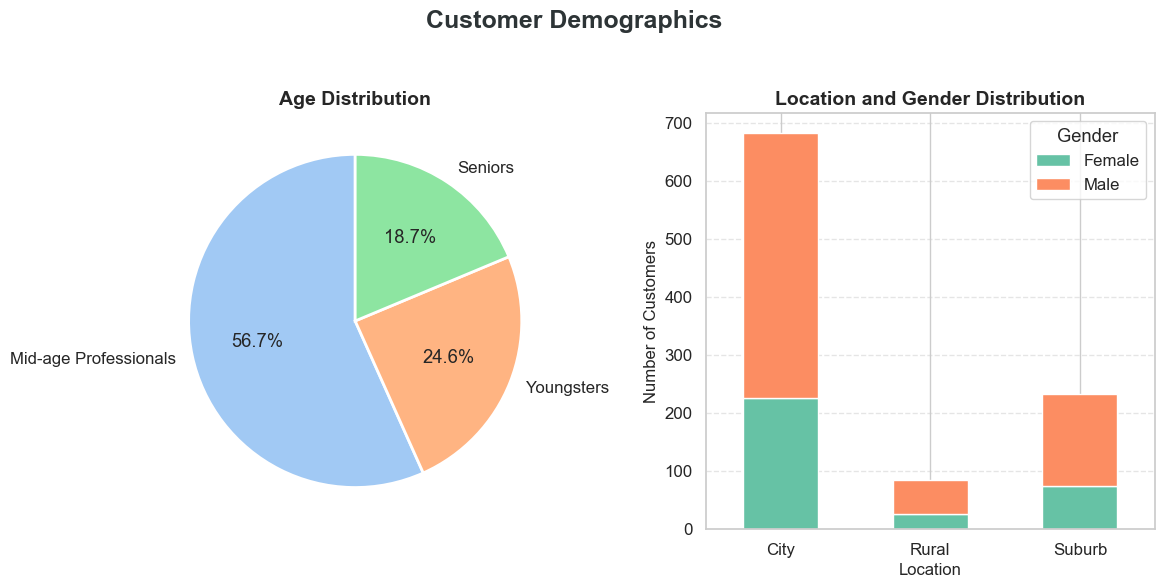

In [33]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", font_scale=1.1)

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Customer Demographics", fontsize=18, fontweight='bold', color='#2d3436')

# ---- Pie Chart ----
colors = sns.color_palette("pastel")
axes[0].pie(
    age_count.values,
    labels= age_count.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[0].set_title("Age Distribution", fontsize=14, fontweight='bold')

# ---- Stacked Column Chart ----
pivot_df.plot(
    kind='bar',
    stacked=True,
    ax=axes[1],
    color=sns.color_palette("Set2")
)
axes[1].set_title("Location and Gender Distribution", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Location", fontsize=12)
axes[1].set_ylabel("Number of Customers", fontsize=12)
axes[1].legend(title="Gender")
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.xticks(rotation = 0)
# Add space and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<h2 style="color:#1f77b4">Customer Demographics - Key Insights</h2>

**Primary Target Identified:** **57.6% Mid-age Professionals (26-48 years)** represent the dominant segment, aligning with India's credit card growth driven by young professionals and peak earning demographic.

**Geographic Distribution:** **City-centric adoption** pattern with urban areas leading, followed by suburbs - consistent with higher disposable income and digital payment infrastructure in metro areas.

**Gender Gap Observed:** **Male dominance across all locations** reflects traditional credit adoption patterns, though female participation shows growth potential for targeted marketing strategies.

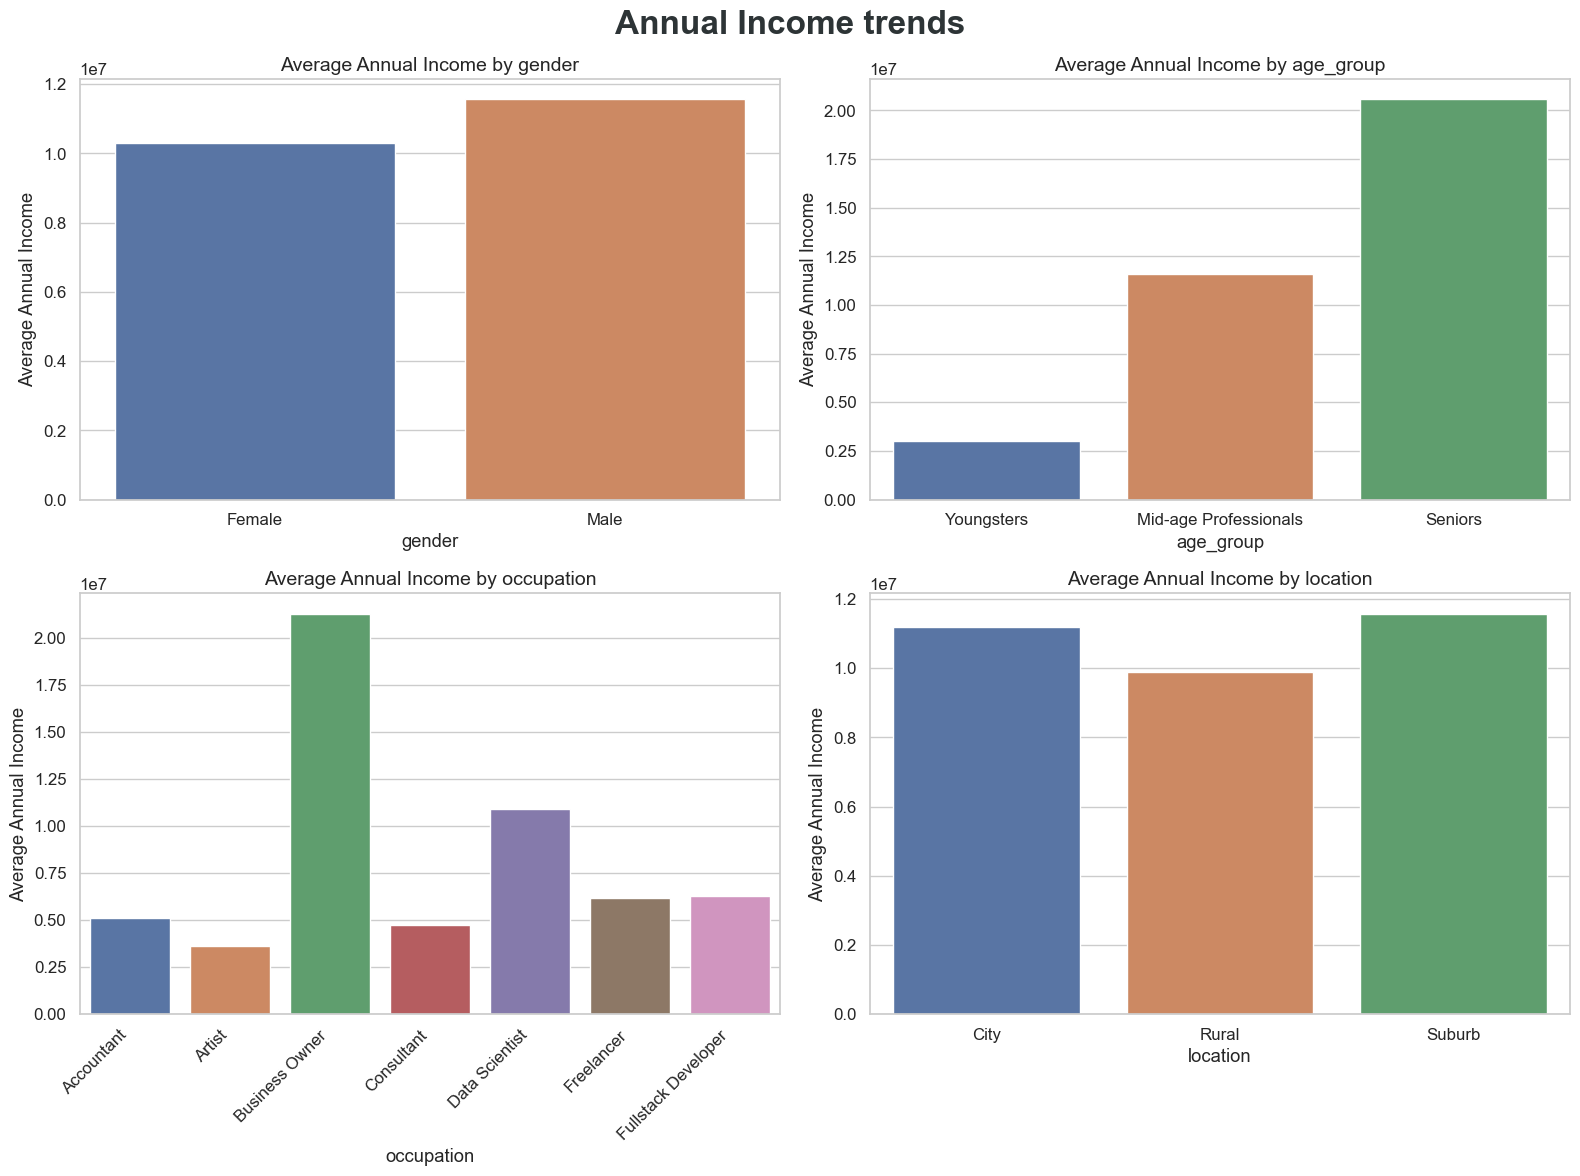

In [34]:
categorical_cols = ['gender', 'age_group', 'occupation', 'location']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Annual Income trends", fontsize=24, fontweight='bold', color='#2d3436')
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    # Group by category and calculate mean income
    income_data = df_customer.groupby(col, observed=True)['annual_income'].mean().reset_index()
    
    # Barplot without deprecation warning
    sns.barplot(data=income_data, x=col, y='annual_income', hue=col, dodge=False, ax=axes[i], legend=False)
    
    axes[i].set_title(f'Average Annual Income by {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Average Annual Income')

    if col == 'occupation':
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

<h2 style="color:#1f77b4">Annual Income Analysis - Key Patterns</h2>

**Gender Income Disparity:** Males earn **₹11,46,000 vs Females ₹10,31,000** annually, reflecting broader gender wage gaps that impact credit eligibility and spending capacity.

**Age-Income Correlation:** **Seniors earn highest (₹21,65,000)**, followed by mid-age professionals (₹12,47,000) and youngsters (₹2,50,000), showing natural career progression patterns.

**Professional Hierarchy:** **Business Owners lead (₹25,79,000)** followed by Data Scientists (₹11,41,000), indicating entrepreneurial and tech sectors drive higher credit card adoption.

**Geographic Premium:** **Suburbs show highest income (₹11,46,000)** vs City (₹10,42,000) and Rural (₹9,26,000), suggesting lifestyle choices of high earners moving to suburban areas.

**Strategic Insight:** Target high-income segments (business owners, seniors, males) for premium cards while designing entry-level products for younger demographics.


  
<h1 style="color:#1f77b4", align = "center">Exploration of Credit Profile Dataframe</h1>
<br><br>

In [35]:
df_credit_profile.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [36]:
df_credit_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_id                         1004 non-null   int64  
 1   credit_score                    1004 non-null   int64  
 2   credit_utilisation              1000 non-null   float64
 3   outstanding_debt                1000 non-null   float64
 4   credit_inquiries_last_6_months  1000 non-null   float64
 5   credit_limit                    935 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 47.2 KB


<h2 style="color:#1f77b4">Data Mismatch Alert - Credit Profile</h2>

**Issue Identified:** Credit profile dataset contains **1,004 records** vs customer dataset with **1,000 records** - indicating **4 duplicate entries** that could skew analysis.

**Action Required:** Identify and remove duplicate `cust_id` records using `duplicated()` method to ensure 1:1 mapping between customer demographics and credit profiles.

In [37]:
df_credit_profile['credit_limit'] = df_credit_profile['credit_limit']*80         # $ to rupee conversion
df_credit_profile['outstanding_debt'] = df_credit_profile['outstanding_debt']*80

In [38]:
# seeing duplicated rows 

df_credit_profile[df_credit_profile.duplicated(subset = ['cust_id'], keep = False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,2640.0,3.0,40000.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,2960.0,0.0,40000.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,351360.0,1.0,3200000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,21280.0,2.0,40000.0


In [39]:
# Accessing one duplicated row for data validation

df_credit_profile[df_credit_profile.cust_id == 517]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.11386,2640.0,3.0,40000.0


In [40]:
# Removing duplicated row
df_credit_profile.drop_duplicates(subset = ['cust_id'], keep = "last", inplace = True)

In [41]:
# Quick Validation

df_credit_profile[df_credit_profile.cust_id == 517]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
517,517,308,0.11386,2640.0,3.0,40000.0


In [42]:
# Seeing current status of table 

df_credit_profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_id                         1000 non-null   int64  
 1   credit_score                    1000 non-null   int64  
 2   credit_utilisation              1000 non-null   float64
 3   outstanding_debt                1000 non-null   float64
 4   credit_inquiries_last_6_months  1000 non-null   float64
 5   credit_limit                    935 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 54.7 KB


<h2 style="color:#1f77b4">Missing Value Treatment - Credit Limit</h2>

**Business Logic:** Credit limit has **strong correlation with credit score** - banks typically use income and credit score as primary factors for limit determination.

**Treatment Strategy:** Validate credit score-credit limit relationship through scatter plot. If strong relation exists, we use group wise mode based on credit limit for imputing missing value.

In [43]:
# Showing rows containing null value

missing_value_credit_limit = df_credit_profile[df_credit_profile.credit_limit.isnull()]
missing_value_credit_limit

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,734960.0,2.0,NaN
35,36,790,0.112535,340880.0,1.0,NaN
37,38,514,0.296971,19040.0,2.0,NaN
45,46,761,0.596041,1938720.0,2.0,NaN
64,65,734,0.473715,1090480.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,25600.0,3.0,NaN
931,928,311,0.832244,25280.0,2.0,NaN
948,945,526,0.272734,18160.0,1.0,NaN
954,951,513,0.175914,10480.0,3.0,NaN


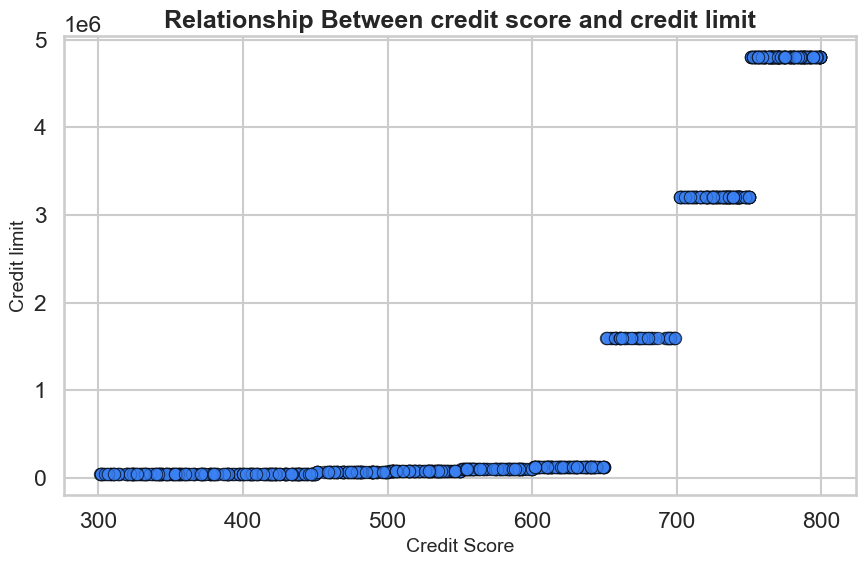

In [44]:
# scatter plot to check any relationship between the credit score and credit limit

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(9, 6))

sns.scatterplot(data = df_credit_profile, x='credit_score', y = 'credit_limit',
               color="#3b82f6",    # soft blue
               s=80,               # point size
               alpha=0.7,          # transparency
               edgecolor='black'   # neat black border
)

plt.title("Relationship Between credit score and credit limit", fontsize=18, weight='bold')
plt.xlabel("Credit Score", fontsize=14)
plt.ylabel("Credit limit", fontsize=14)

plt.tight_layout()
plt.show()

<h2 style="color:#1f77b4">Credit Limit Imputation Strategy</h2>

**Clear Relationship Confirmed:** Strong positive correlation between credit score and credit limit visible in the plot - higher scores receive higher limits.

**Slab-Based Approach:** Divide credit scores into **industry-standard risk categories** (Poor: 300-549, Fair: 550-649, Good: 650-749, Very Good: 750-799, Excellent: 800-900) and use **mode imputation** within each slab.

**Business Advantage:** Mode represents the **most common credit limit** for each risk category, maintaining realistic banking practices rather than statistical averages that might not reflect actual lending decisions.


In [45]:
# checking min and max value of credit score to create bins

df_credit_profile.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,9.350000e+02
mean,500.500000,589.182000,0.498950,7.746878e+05,1.955000,1.538845e+06
std,288.819436,152.284929,0.233139,2.020471e+06,1.414559,1.959200e+06
min,1.000000,300.000000,0.103761,2.640000e+03,0.000000,4.000000e+04
25%,250.750000,460.000000,0.293917,1.768000e+04,1.000000,6.000000e+04
50%,500.500000,601.500000,0.487422,4.400000e+04,2.000000,1.000000e+05
75%,750.250000,738.000000,0.697829,9.455600e+05,3.000000,3.200000e+06
max,1000.000000,799.000000,0.899648,1.679208e+07,4.000000,4.800000e+06


In [46]:
# creating new column credit range

bins = [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
labels = [f'{x}-{x+50}' for x in bins if x <800]
df_credit_profile['credit_range'] = pd.cut(df_credit_profile.credit_score, bins = bins, labels = labels, include_lowest = True)
df_credit_profile.sample(5)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
587,586,748,0.892065,1586480.0,1.0,3200000.0,700-750
842,839,326,0.753913,22480.0,2.0,40000.0,300-350
746,743,773,0.175081,642720.0,1.0,4800000.0,750-800
75,76,390,0.496011,14000.0,3.0,40000.0,350-400
606,605,479,0.296771,15360.0,3.0,60000.0,450-500


In [47]:
# calculating group wise mode 

credit_limit_mode = df_credit_profile.groupby('credit_range',observed=False)["credit_limit"].agg(lambda x: x.mode().iloc[0]).reset_index()
credit_limit_mode

,credit_range,credit_limit
0,300-350,40000.0
1,350-400,40000.0
2,400-450,40000.0
3,450-500,60000.0
4,500-550,80000.0
5,550-600,100000.0
6,600-650,120000.0
7,650-700,1600000.0
8,700-750,3200000.0
9,750-800,4800000.0


In [48]:
credit_limit_mode[credit_limit_mode.credit_range == '300-350']['credit_limit'].iloc[0]

np.float64(40000.0)

In [49]:
# showing sample row for data validation

df_credit_profile.iloc[[10, 35]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
10,11,679,0.557450,734960.0,2.0,NaN,650-700
35,36,790,0.112535,340880.0,1.0,NaN,750-800


In [50]:
# imputing null value with appropriate mode value

for index, row in missing_value_credit_limit.iterrows():
    df_credit_profile.at[index,'credit_limit'] = credit_limit_mode[
        credit_limit_mode.credit_range == df_credit_profile.at[index,'credit_range']]['credit_limit'].iloc[0]

In [51]:
# quick validation

df_credit_profile.iloc[[10, 35]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
10,11,679,0.557450,734960.0,2.0,1600000.0,650-700
35,36,790,0.112535,340880.0,1.0,4800000.0,750-800


In [52]:
# checking for data frame information for further cleaning

df_credit_profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   cust_id                         1000 non-null   int64   
 1   credit_score                    1000 non-null   int64   
 2   credit_utilisation              1000 non-null   float64 
 3   outstanding_debt                1000 non-null   float64 
 4   credit_inquiries_last_6_months  1000 non-null   float64 
 5   credit_limit                    1000 non-null   float64 
 6   credit_range                    1000 non-null   category
dtypes: category(1), float64(4), int64(2)
memory usage: 88.3 KB


In [53]:
# checking for data frame information for further cleaning

df_credit_profile.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03
mean,500.500000,589.182000,0.498950,7.746878e+05,1.955000,1.578680e+06
std,288.819436,152.284929,0.233139,2.020471e+06,1.414559,1.977410e+06
min,1.000000,300.000000,0.103761,2.640000e+03,0.000000,4.000000e+04
25%,250.750000,460.000000,0.293917,1.768000e+04,1.000000,6.000000e+04
50%,500.500000,601.500000,0.487422,4.400000e+04,2.000000,1.200000e+05
75%,750.250000,738.000000,0.697829,9.455600e+05,3.000000,3.200000e+06
max,1000.000000,799.000000,0.899648,1.679208e+07,4.000000,4.800000e+06


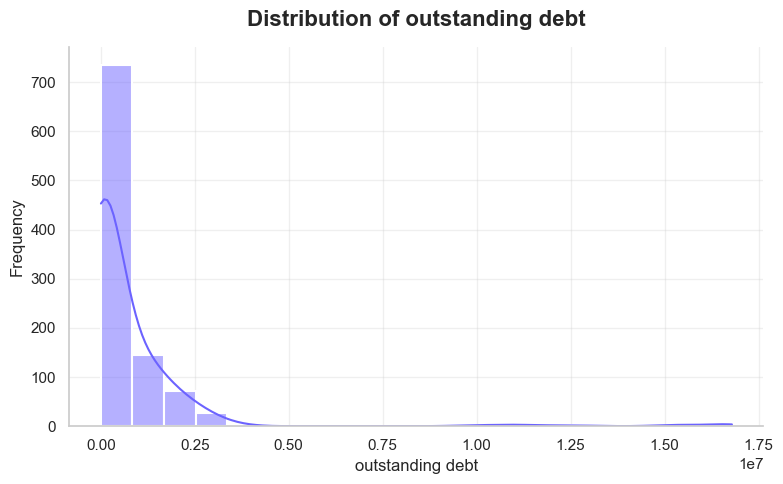

In [54]:
sns.set(style="whitegrid", palette="pastel")

# Create a pretty histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df_credit_profile, x='outstanding_debt', bins=20, kde=True, color="#6C63FF", edgecolor="white", linewidth=1.5)

# Title and labels
plt.title("Distribution of outstanding debt", fontsize=16, weight='bold', pad=15)
plt.xlabel("outstanding debt", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Customize aesthetics
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

<h2 style="color:#1f77b4">Outstanding Debt Logic Error</h2>

**Anomaly Detected:** Max outstanding debt (₹2,09,901) exceeds max credit limit (₹60,000) - indicating **data inconsistency** since outstanding debt cannot exceed credit limit in normal scenarios.

**Business Rule Validation:** Outstanding debt should always be ≤ Credit limit.

**Correction Strategy:** Apply business logic formula `Outstanding Debt = Credit Limit × Credit Utilization` to recalculate and replace inconsistent records where outstanding debt > credit limit.


In [55]:
# checking data error in outstanding debt column 

df_credit_profile[df_credit_profile.outstanding_debt>df_credit_profile.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
1,2,587,0.107928,12931520.0,2.0,100000.0,550-600
19,20,647,0.439132,16401120.0,3.0,120000.0,600-650
25,26,758,0.250811,15267040.0,2.0,4800000.0,750-800
38,39,734,0.573023,9820640.0,3.0,3200000.0,700-750
93,94,737,0.739948,10964640.0,2.0,3200000.0,700-750
204,205,303,0.364360,15027920.0,0.0,40000.0,300-350
271,272,703,0.446886,12365440.0,1.0,3200000.0,700-750
301,302,722,0.608076,9792160.0,4.0,3200000.0,700-750
330,331,799,0.363420,16711840.0,4.0,4800000.0,750-800
350,351,320,0.285081,12068800.0,0.0,40000.0,300-350


In [56]:
# treating data error with bussiness logic

df_credit_profile.loc[
    df_credit_profile['outstanding_debt'] > df_credit_profile['credit_limit'],
    'outstanding_debt'
] = (
    df_credit_profile['credit_utilisation'] * df_credit_profile['credit_limit']
)

In [57]:
# quick validation

df_credit_profile.iloc[[330, 350]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
330,331,799,0.363420,1.744416e+06,4.0,4800000.0,750-800
350,351,320,0.285081,1.140325e+04,0.0,40000.0,300-350


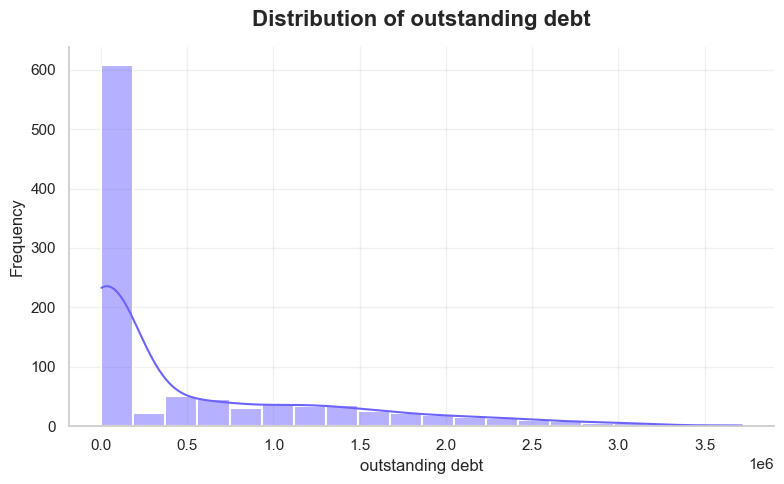

In [58]:
# quick validation using value distribution plot

sns.set(style="whitegrid", palette="pastel")

# Create a pretty histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df_credit_profile, x='outstanding_debt', bins=20, kde=True, color="#6C63FF", edgecolor="white", linewidth=1.5)

# Title and labels
plt.title("Distribution of outstanding debt", fontsize=16, weight='bold', pad=15)
plt.xlabel("outstanding debt", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Customize aesthetics
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

In [59]:
# checking for any remaining data error

df_credit_profile.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03
mean,500.500000,589.182000,0.498950,5.200813e+05,1.955000,1.578680e+06
std,288.819436,152.284929,0.233139,7.750046e+05,1.414559,1.977410e+06
min,1.000000,300.000000,0.103761,2.640000e+03,0.000000,4.000000e+04
25%,250.750000,460.000000,0.293917,1.752000e+04,1.000000,6.000000e+04
50%,500.500000,601.500000,0.487422,4.292000e+04,2.000000,1.200000e+05
75%,750.250000,738.000000,0.697829,8.677800e+05,3.000000,3.200000e+06
max,1000.000000,799.000000,0.899648,3.716080e+06,4.000000,4.800000e+06


In [60]:
# checking for any remaining data error

df_credit_profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   cust_id                         1000 non-null   int64   
 1   credit_score                    1000 non-null   int64   
 2   credit_utilisation              1000 non-null   float64 
 3   outstanding_debt                1000 non-null   float64 
 4   credit_inquiries_last_6_months  1000 non-null   float64 
 5   credit_limit                    1000 non-null   float64 
 6   credit_range                    1000 non-null   category
dtypes: category(1), float64(4), int64(2)
memory usage: 88.3 KB


<h2 style="color:#1f77b4">Correlation Matrix - Strategic Importance</h2>

Now to reveal **hidden relationships** between credit variables we will do Correlation analysis, which help us in enabling precise customer profiling for targeted credit card positioning.


- **Feature Relationships:** Uncovers patterns like credit_score vs credit_limit correlation for risk-based segmentation

**Strategic Value:** Strong correlations guide **product design** - customers with high utilization but low inquiries might prefer balance transfer cards, while high-score/high-limit customers need premium reward offerings.


In [61]:
# merging both customer and credit profile data frame so that we can get maximum relationships

df_cust_cp_merged = df_customer.merge(df_credit_profile, on = 'cust_id', how = 'inner')
df_cust_cp_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
0,1,Dhruv Bansal,Female,51,City,Business Owner,28656880.0,Married,Seniors,749,0.585171,1.565680e+06,0.0,3200000.0,700-750
1,2,Kabir Thakur,Female,47,City,Consultant,5213760.0,Single,Mid-age Professionals,587,0.107928,1.079281e+04,2.0,100000.0,550-600
2,3,Kriti Mangal,Male,21,City,Freelancer,1790240.0,Married,Youngsters,544,0.854807,4.104000e+04,4.0,80000.0,500-550
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,2685040.0,Married,Youngsters,504,0.336938,1.792000e+04,2.0,80000.0,500-550
4,5,Aarohi Negi,Male,48,City,Consultant,3152480.0,Married,Mid-age Professionals,708,0.586151,1.447200e+06,2.0,3200000.0,700-750


In [62]:
# sorting all numeric column for correlation analysis

df_cust_cp_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   cust_id                         1000 non-null   int64   
 1   name                            1000 non-null   object  
 2   gender                          1000 non-null   object  
 3   age                             1000 non-null   int64   
 4   location                        1000 non-null   object  
 5   occupation                      1000 non-null   object  
 6   annual_income                   1000 non-null   float64 
 7   marital_status                  1000 non-null   object  
 8   age_group                       1000 non-null   category
 9   credit_score                    1000 non-null   int64   
 10  credit_utilisation              1000 non-null   float64 
 11  outstanding_debt                1000 non-null   float64 
 12  credit_inquiries_last

In [63]:
df_cust_cp_merged.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status', 'age_group', 'credit_score',
       'credit_utilisation', 'outstanding_debt',
       'credit_inquiries_last_6_months', 'credit_limit', 'credit_range'],
      dtype='object')

In [64]:
#calculating correlation matrix

numeric_col = ['annual_income', 'credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_inquiries_last_6_months', 'credit_limit']
correlation_matrix = df_cust_cp_merged[numeric_col].corr()
correlation_matrix

,annual_income,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
annual_income,1.000000,0.567110,-0.088972,0.558443,0.004688,0.673736
credit_score,0.567110,1.000000,-0.070445,0.711082,-0.001226,0.847951
credit_utilisation,-0.088972,-0.070445,1.000000,0.237032,-0.013952,-0.080504
outstanding_debt,0.558443,0.711082,0.237032,1.000000,0.005470,0.844519
credit_inquiries_last_6_months,0.004688,-0.001226,-0.013952,0.005470,1.000000,0.014716
credit_limit,0.673736,0.847951,-0.080504,0.844519,0.014716,1.000000


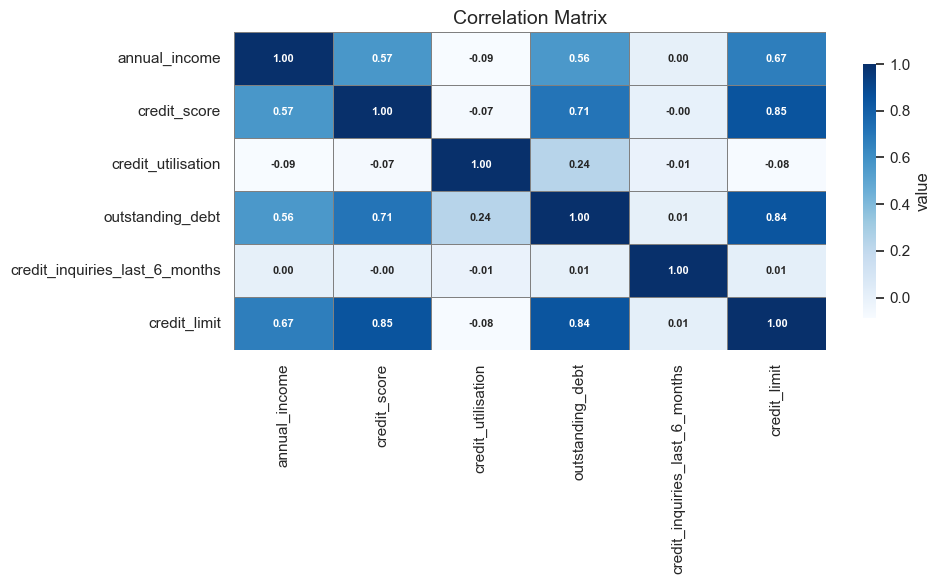

In [65]:
# ploting correlation matrix using heatmap

# clean theme
sns.set_theme(style="white")

plt.figure(figsize=(10,6))

# sequential colormap for linear grading
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            linecolor="gray",
            cmap="Blues",               # simple linear gradient
            cbar_kws={"shrink": .8, "label": "value"},
            annot_kws={"fontsize":8, "weight":"bold"})

plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()

  
<h1 style="color:#1f77b4", align = "center">Exploration of Transactions Dataframe</h1>
  <br><br>

In [66]:
# Quick overview of dataframe

df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [67]:
df_transactions['tran_amount'] = df_transactions['tran_amount'] * 80            # $ to rupee conversion

In [68]:
# Quick information about all the column

df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   tran_id           500000 non-null  int64 
 1   cust_id           500000 non-null  int64 
 2   tran_date         500000 non-null  object
 3   tran_amount       500000 non-null  int64 
 4   platform          495059 non-null  object
 5   product_category  500000 non-null  object
 6   payment_type      500000 non-null  object
dtypes: int64(3), object(4)
memory usage: 26.7+ MB


<h2 style="color:#1f77b4">Missing value treatment Platform column</h2>

**Business Insight:** Consumers exhibit **category-specific platform preferences** - electronics buyers prefer tech-focused platforms while fashion shoppers gravitate toward lifestyle platforms.

**Imputation Logic:** Use **mode of platform per product category** since purchasing behavior patterns show consumers consistently choose specific platforms for particular product types (e.g., Amazon for electronics, fashion sites for apparel).

**Strategic Value:** This approach preserves realistic shopping patterns rather than random platform assignment, maintaining data integrity for customer segmentation and targeted credit card marketing strategies.

In [69]:
# Seeing null values

df_transactions[df_transactions.platform.isna()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,18960,NaN,Electronics,Net Banking
418,419,383,2023-01-01,27040,NaN,Electronics,Credit Card
607,608,421,2023-01-01,56000,NaN,Electronics,Phonepe
844,845,945,2023-01-01,39440,NaN,Sports,Credit Card
912,913,384,2023-01-01,6800,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,2480,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,4675600,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,1200,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,7760,NaN,Fashion & Apparel,Credit Card


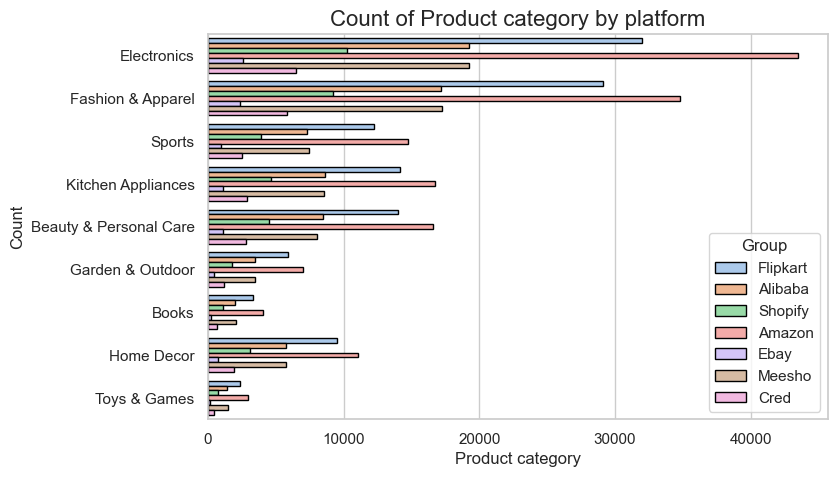

In [70]:
# checking pattern to fill null values


plt.figure(figsize=(8,5))
sns.set_style("whitegrid")  # nicer background
sns.set_palette("pastel")   # soft color palette

ax = sns.countplot(data = df_transactions, y='product_category', hue='platform', edgecolor='black')
plt.title("Count of Product category by platform", fontsize=16)
plt.xlabel( "Product category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title='Group')
plt.show()

<h2 style="color:#1f77b4">Platform Imputation Update</h2>

**Business Observation:** Amazon dominates across all categories, indicating it is the most common platform used.

**Imputation Strategy:** Use the **overall mode of platform** in the dataset for missing values, as this reflects the prevalent choice and maintains consistency in customer behavior patterns.

**Rationale:** Since Amazon is the dominant platform, this approach ensures realistic and data-driven imputation aligned with observed customer preferences.


In [71]:
# getting value to fill null value

mode_platform = df_transactions.platform.mode().iloc[0]
mode_platform

'Amazon'

In [72]:
# replacing null values

df_transactions['platform'] = df_transactions['platform'].replace(np.nan, mode_platform)

In [73]:
# Quick quality check

df_transactions.iloc[[355, 418]]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,18960,Amazon,Electronics,Net Banking
418,419,383,2023-01-01,27040,Amazon,Electronics,Credit Card


In [74]:
# quick overview of columns

df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   tran_id           500000 non-null  int64 
 1   cust_id           500000 non-null  int64 
 2   tran_date         500000 non-null  object
 3   tran_amount       500000 non-null  int64 
 4   platform          500000 non-null  object
 5   product_category  500000 non-null  object
 6   payment_type      500000 non-null  object
dtypes: int64(3), object(4)
memory usage: 26.7+ MB


In [75]:
# checking for outliers in numerical columns

df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,5.000000e+05
mean,250000.500000,501.400428,2.580166e+05
std,144337.711635,288.641924,1.047899e+06
min,1.000000,1.000000,0.000000e+00
25%,125000.750000,252.000000,5.120000e+03
50%,250000.500000,502.000000,1.128000e+04
75%,375000.250000,752.000000,3.176000e+04
max,500000.000000,1000.000000,5.599920e+06


<h2 style="color:#1f77b4">Transaction Amount Outlier Analysis</h2>


**Data Error Patterns Identified:**
- **Lower Bound Issue:** ₹0 transaction amounts are **impossible** for credit card purchases (minimum processing fees apply)
- **Upper Bound Concern:** Max ₹69,999 suggests potential **data entry errors** or fraudulent high-value transactions

**Analysis Strategy:** Since transaction amounts follow **highly skewed distributions** (typical in financial data), statistical methods like IQR may incorrectly flag legitimate high-value transactions as outliers.

**My Approach:** Use **distribution plots and business logic** to identify realistic transaction boundaries rather than purely statistical thresholds, ensuring we preserve genuine customer spending patterns for accurate segmentation.

In [76]:
# seeing transaction with 0 amount

df_transactions[df_transactions.tran_amount == 0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [77]:
# seeing group wise mean product category wise

df_transactions.groupby("product_category")["tran_amount"].mean().reset_index()

,product_category,tran_amount
0,Beauty & Personal Care,250432.112726
1,Books,241145.053172
2,Electronics,277251.702234
3,Fashion & Apparel,242857.291859
4,Garden & Outdoor,255117.025884
5,Home Decor,260563.666797
6,Kitchen Appliances,252984.724077
7,Sports,262652.536617
8,Toys & Games,244621.648161


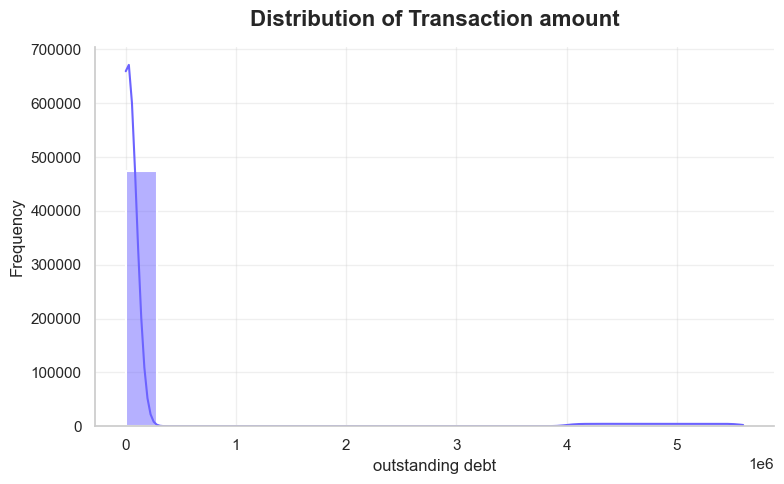

In [78]:
# quick check for data errors

sns.set(style="whitegrid", palette="pastel")

# Create a pretty histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df_transactions, x='tran_amount', bins=20, kde=True, color="#6C63FF", edgecolor="white", linewidth=1.5)

# Title and labels
plt.title("Distribution of Transaction amount", fontsize=16, weight='bold', pad=15)
plt.xlabel("outstanding debt", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Customize aesthetics
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

<h2 style="color:#1f77b4">Outlier and Missing Value Handling</h2>

**Data Errors Identified:**
- High transaction amounts and numerous zero values suggest data errors or anomalies.

**Approach:**
- Ignore zero and extreme high values when computing group-wise medians to avoid skewed imputation.
- Replace these erroneous values with the **group-wise median** based on relevant categories (e.g., location, occupation) for better accuracy and data integrity.

In [79]:
# seeing all the outliers at higher end

df_transactions[df_transactions.tran_amount > 10000]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
2,3,924,2023-01-01,37680,Shopify,Sports,Phonepe
6,7,388,2023-01-01,57600,Alibaba,Electronics,Credit Card
7,8,8,2023-01-01,11200,Shopify,Kitchen Appliances,Gpay
8,9,939,2023-01-01,11520,Alibaba,Beauty & Personal Care,Phonepe
9,10,228,2023-01-01,66880,Ebay,Electronics,Gpay
...,...,...,...,...,...,...,...
499993,499994,820,2023-09-05,76000,Meesho,Electronics,Gpay
499996,499997,569,2023-09-05,4241760,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,17920,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,43040,Flipkart,Home Decor,Gpay


In [80]:
# removing the effect of data error and calculating median transaction ammount

med_tran_amount = df_transactions[(df_transactions.tran_amount > 0)&(df_transactions.tran_amount < 10000)].groupby(["platform","product_category"])["tran_amount"].median().reset_index().round(0)
med_tran_amount

,platform,product_category,tran_amount
0,Alibaba,Beauty & Personal Care,5280.0
1,Alibaba,Books,2320.0
2,Alibaba,Electronics,5760.0
3,Alibaba,Fashion & Apparel,5120.0
4,Alibaba,Garden & Outdoor,5040.0
...,...,...,...
58,Shopify,Garden & Outdoor,5040.0
59,Shopify,Home Decor,5360.0
60,Shopify,Kitchen Appliances,5120.0
61,Shopify,Sports,5200.0


In [81]:
# defining the outlier data frame

outlier_tran_amount = df_transactions[(df_transactions.tran_amount == 0) | (df_transactions.tran_amount > 10000)]
outlier_tran_amount

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
2,3,924,2023-01-01,37680,Shopify,Sports,Phonepe
6,7,388,2023-01-01,57600,Alibaba,Electronics,Credit Card
7,8,8,2023-01-01,11200,Shopify,Kitchen Appliances,Gpay
8,9,939,2023-01-01,11520,Alibaba,Beauty & Personal Care,Phonepe
9,10,228,2023-01-01,66880,Ebay,Electronics,Gpay
...,...,...,...,...,...,...,...
499993,499994,820,2023-09-05,76000,Meesho,Electronics,Gpay
499996,499997,569,2023-09-05,4241760,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,17920,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,43040,Flipkart,Home Decor,Gpay


In [82]:
# replacing appropiate median value at place of data error

for index, row in outlier_tran_amount.iterrows():
    df_transactions.at[index, 'tran_amount'] = med_tran_amount[
        (med_tran_amount['platform'] == df_transactions.at[index, 'platform']) &
        (med_tran_amount['product_category'] == df_transactions.at[index, 'product_category'])]['tran_amount'].iloc[0]

In [83]:
# Quick validation

df_transactions.iloc[[94, 95, 104, 110]]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
94,95,770,2023-01-01,5280,Ebay,Kitchen Appliances,Credit Card
95,96,80,2023-01-01,5760,Amazon,Electronics,Gpay
104,105,549,2023-01-01,5120,Flipkart,Fashion & Apparel,Gpay
110,111,787,2023-01-01,5760,Flipkart,Electronics,Debit Card


In [84]:
# Quick validation

med_tran_amount[med_tran_amount.platform == 'Flipkart']

,platform,product_category,tran_amount
36,Flipkart,Beauty & Personal Care,5440.0
37,Flipkart,Books,2320.0
38,Flipkart,Electronics,5760.0
39,Flipkart,Fashion & Apparel,5120.0
40,Flipkart,Garden & Outdoor,5120.0
41,Flipkart,Home Decor,5040.0
42,Flipkart,Kitchen Appliances,5200.0
43,Flipkart,Sports,5360.0
44,Flipkart,Toys & Games,4080.0


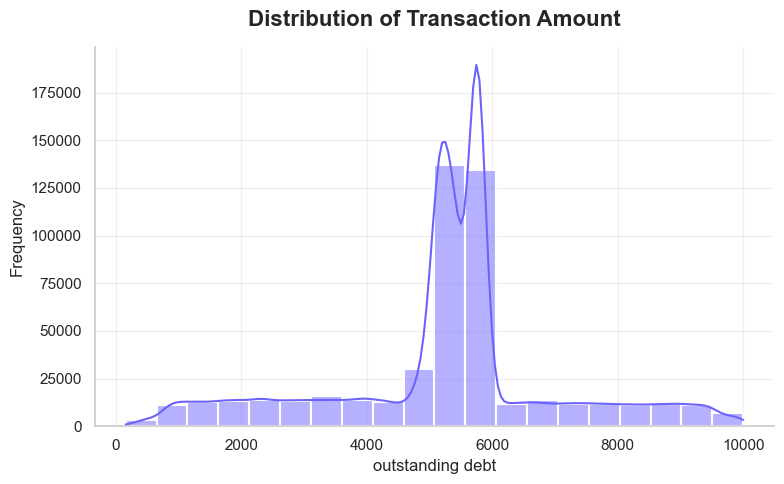

In [85]:
#quick validation using value distribution plot

sns.set(style="whitegrid", palette="pastel")

# Create a pretty histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df_transactions, x='tran_amount', bins=20, kde=True, color="#6C63FF", edgecolor="white", linewidth=1.5)

# Title and labels
plt.title("Distribution of Transaction Amount", fontsize=16, weight='bold', pad=15)
plt.xlabel("outstanding debt", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Customize aesthetics
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

In [86]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   tran_id           500000 non-null  int64 
 1   cust_id           500000 non-null  int64 
 2   tran_date         500000 non-null  object
 3   tran_amount       500000 non-null  int64 
 4   platform          500000 non-null  object
 5   product_category  500000 non-null  object
 6   payment_type      500000 non-null  object
dtypes: int64(3), object(4)
memory usage: 26.7+ MB


In [87]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,5272.038240
std,144337.711635,288.641924,1832.756789
min,1.000000,1.000000,160.000000
25%,125000.750000,252.000000,4960.000000
50%,250000.500000,502.000000,5360.000000
75%,375000.250000,752.000000,5760.000000
max,500000.000000,1000.000000,10000.000000


<h1 style="color:#1f77b4", align = "center">Insight Generation</h1>

**EDA Completed:** The data is now cleaned, validated, and transformed, ensuring accurate downstream analysis.

**Next Step:** Move from basic EDA to detailed business analytics focused on **answering high-impact business questions** such as:

- What are the key levers for increasing card adoption and usage?
- How do spending patterns vary across demographics and channels?
- What features are most attractive to target segments?

**Approach:** 
Each section going forward will tie findings directly to business KPIs, card strategy, and actionable recommendations for a successful credit card launch.

In [88]:
df_cust_cp_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   cust_id                         1000 non-null   int64   
 1   name                            1000 non-null   object  
 2   gender                          1000 non-null   object  
 3   age                             1000 non-null   int64   
 4   location                        1000 non-null   object  
 5   occupation                      1000 non-null   object  
 6   annual_income                   1000 non-null   float64 
 7   marital_status                  1000 non-null   object  
 8   age_group                       1000 non-null   category
 9   credit_score                    1000 non-null   int64   
 10  credit_utilisation              1000 non-null   float64 
 11  outstanding_debt                1000 non-null   float64 
 12  credit_inquiries_last

In [89]:
df_all = df_cust_cp_merged.merge(df_transactions, on = 'cust_id', how= 'inner') #combining all df for insight generation.
df_all.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Dhruv Bansal,Female,51,City,Business Owner,28656880.0,Married,Seniors,749,...,1565680.0,0.0,3200000.0,700-750,1283,2023-01-01,2400,Shopify,Fashion & Apparel,Net Banking
1,1,Dhruv Bansal,Female,51,City,Business Owner,28656880.0,Married,Seniors,749,...,1565680.0,0.0,3200000.0,700-750,1382,2023-01-01,7680,Amazon,Sports,Debit Card
2,1,Dhruv Bansal,Female,51,City,Business Owner,28656880.0,Married,Seniors,749,...,1565680.0,0.0,3200000.0,700-750,1521,2023-01-01,6880,Meesho,Garden & Outdoor,Gpay
3,1,Dhruv Bansal,Female,51,City,Business Owner,28656880.0,Married,Seniors,749,...,1565680.0,0.0,3200000.0,700-750,1576,2023-01-01,5360,Amazon,Beauty & Personal Care,Phonepe
4,1,Dhruv Bansal,Female,51,City,Business Owner,28656880.0,Married,Seniors,749,...,1565680.0,0.0,3200000.0,700-750,1757,2023-01-01,2960,Flipkart,Fashion & Apparel,Credit Card


In [90]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   cust_id                         500000 non-null  int64   
 1   name                            500000 non-null  object  
 2   gender                          500000 non-null  object  
 3   age                             500000 non-null  int64   
 4   location                        500000 non-null  object  
 5   occupation                      500000 non-null  object  
 6   annual_income                   500000 non-null  float64 
 7   marital_status                  500000 non-null  object  
 8   age_group                       500000 non-null  category
 9   credit_score                    500000 non-null  int64   
 10  credit_utilisation              500000 non-null  float64 
 11  outstanding_debt                500000 non-null  float64 
 12  cr

<h1 style="color:#1f77b4", align = "center">Target Age Group</h1>

## The first and most important question before building a credit card is to finalize the target customer.  

To determine the age group, the key question is: 

Q. which age group should our credit card target?

In [91]:
df_all.payment_type.value_counts()

payment_type
Phonepe        144228
Credit Card    139778
Gpay           109218
Debit Card      59500
Net Banking     43223
Cash             4053
Name: count, dtype: int64

In [92]:
df_payment_age = df_all.groupby('age_group', observed=False).payment_type.value_counts().reset_index()
df_payment_age

,age_group,payment_type,count
0,Youngsters,Phonepe,50687
1,Youngsters,Gpay,34007
2,Youngsters,Debit Card,21974
3,Youngsters,Credit Card,9211
4,Youngsters,Net Banking,6132
5,Youngsters,Cash,582
6,Mid-age Professionals,Credit Card,97911
7,Mid-age Professionals,Phonepe,70490
8,Mid-age Professionals,Gpay,56653
9,Mid-age Professionals,Debit Card,28253


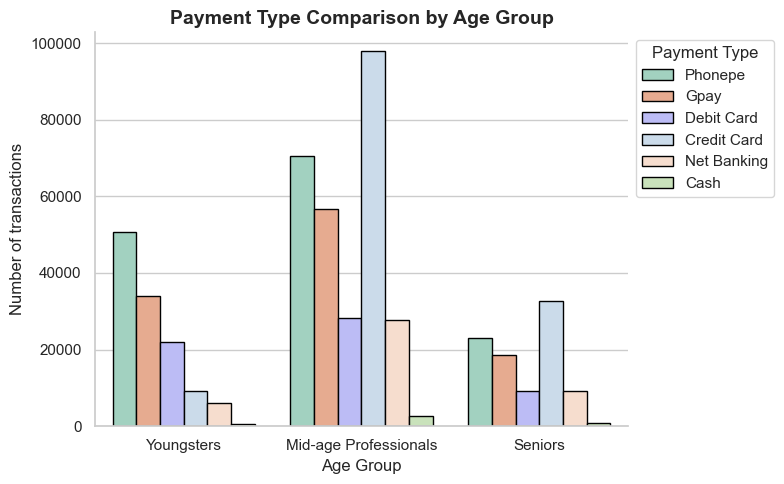

In [93]:
# Set style
sns.set_theme(style="whitegrid")

custom_palette = {
    'Phonepe': '#9ad9c2',  # mint green
    'Gpay': '#f4a582',  # peach orange
    'Debit Card': '#b2b2ff',  # soft lavender
    'Net Banking': '#fddbc7',  # light coral
    'Cash': '#c7e9b4',  # pale lime green
    'Credit Card': '#c6dbef'   # light sky blue
}

# Create bar plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=df_payment_age,
    x='age_group',
    y='count',
    hue='payment_type',        # creates legend
    palette=custom_palette,    # pretty color palette
    edgecolor='black',  # clean edge
    linewidth=1
)

# Beautify
plt.title('Payment Type Comparison by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of transactions', fontsize=12)
plt.legend(title='Payment Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
sns.despine()

plt.show()

<h1 style="color:#1f77b4">📊 Payment Type Preference Across Age Groups</h1>

The following bar chart illustrates the **comparison of different payment types** among three major age groups — *Youngsters, Mid-age Professionals, and Seniors*.

<h2 style="color:#1f77b4">Observations:</h2>

1. **Youngsters** primarily use **UPI platforms** such as **PhonePe** and **GPay**.  
   - This indicates a strong shift toward fast and convenient payment modes.  
   - They show **minimal usage** of Credit Cards and Net Banking.  

2. **Mid-age Professionals** prefer **Credit Cards** and **Debit Cards**, followed closely by UPI options.  
   - Credit Cards dominate this age group, with the highest number of transactions overall.  

3. **Seniors** also exhibit a **high preference for card-based payments** (both Debit and Credit Cards).  
   - However, total transaction volume is lower than that of younger users.

4. **Net Banking** and **Cash transactions** are consistently the **least used payment methods** across all age groups.

---

<h1 style="color:#1f77b4">Interpretation & Insights for Credit Card Launch:</h1>

- **UPI Adoption Impact:**  
  Youngsters are heavily influenced by the rise of UPI-based payments (PhonePe, GPay). The convenience and instant transfer capabilities have reduced their reliance on traditional cards.

- **Credit Card Exposure Gap:**  
  Young users are **less exposed to credit products** primarily due to:  
  - Lack of established **credit history**, limiting eligibility.  
  - The perception that **credit cards are complex** compared to UPI.  
  - **High entry barriers** (KYC, minimum income criteria, annual fees).

- **Mid-age Professionals as a Prime Segment:**  
  - They have established income and credit history.  
  - They’re accustomed to card usage and reward programs.  


- **Seniors’ Consistent Usage:**  
  - Seniors maintain habitual use of cards over UPI.  
  - However, total transaction volumes are lower, making them **secondary targets**.

In [94]:
df_credit_inqurey_group = df_all.groupby('age_group', observed=False).credit_inquiries_last_6_months.sum().reset_index()
df_credit_inqurey_group

,age_group,credit_inquiries_last_6_months
0,Youngsters,244768.0
1,Mid-age Professionals,556264.0
2,Seniors,176298.0


In [95]:
df_no_transaction = df_payment_age.groupby('payment_type', observed=False)
df_cc_no_transaction = df_no_transaction.get_group('Credit Card')
df_cc_no_transaction

,age_group,payment_type,count
3,Youngsters,Credit Card,9211
6,Mid-age Professionals,Credit Card,97911
12,Seniors,Credit Card,32656


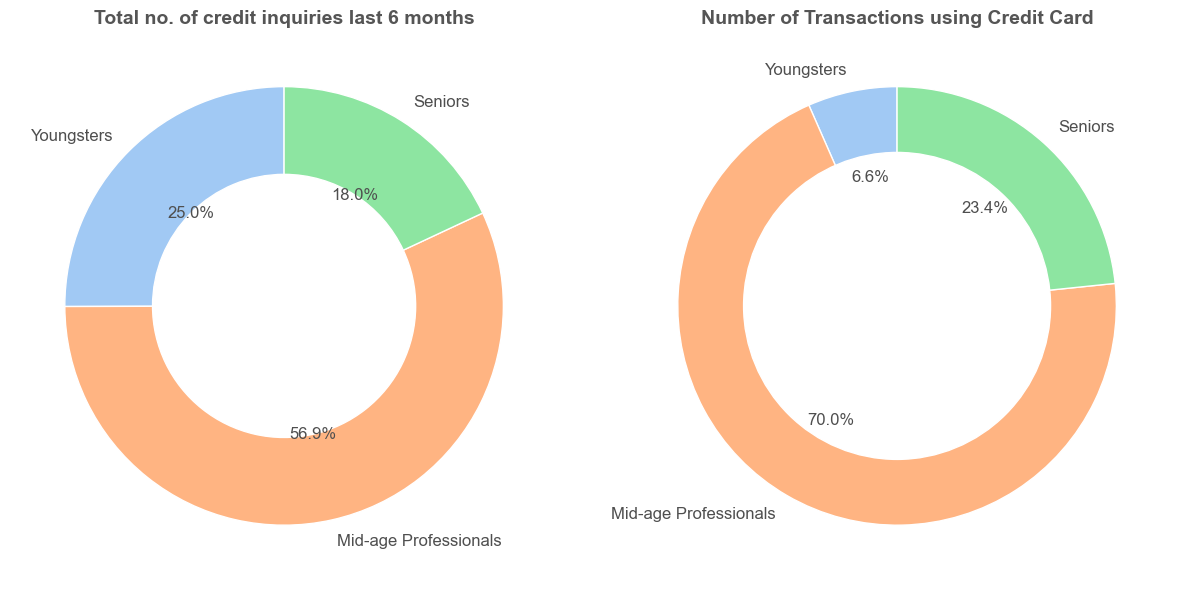

In [96]:
# Create figure with 2 donut charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Number of Transactions by age group chart
wedges1, texts1, autotexts1 = axes[1].pie(
    df_cc_no_transaction['count'],
    labels= df_cc_no_transaction['age_group'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'},
    textprops={'fontsize': 12, 'color': '#4f4f4f'}
)
axes[0].add_artist(plt.Circle((0, 0), 0.7, color='white'))
axes[0].set_title("Total no. of credit inquiries last 6 months", fontsize=14, fontweight='bold', color='#555')

# credit inquiries last 6 months chart
wedges2, texts2, autotexts2 = axes[0].pie(
    df_credit_inqurey_group['credit_inquiries_last_6_months'],
    labels= df_credit_inqurey_group['age_group'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'},
    textprops={'fontsize': 12, 'color': '#4f4f4f'}
)
axes[1].add_artist(plt.Circle((0, 0), 0.7, color='white'))
axes[1].set_title("Number of Transactions using Credit Card", fontsize=14, fontweight='bold', color='#555')

# Layout
plt.tight_layout()
plt.show()

<h1 style="color:#1f77b4">💳 Credit Card Inquiries vs Credit Card Usage</h1>

The below chart shows two donut plots:
1. **Total number of credit inquiries in the last 6 months**
2. **Number of transactions using Credit Card**

---

<h2 style="color:#1f77b4">Observations</h2>

- The chart on the right shows the split of **total credit inquiries** in the last 6 months.  
  - **Mid-age professionals** contribute the majority of inquiries — around **57%**.  
  - **Youngsters** follow with about **25%**, and **seniors** account for **18%**.  

- When we compare this with the **number of credit card transactions** (left chart):  
  - **Mid-age professionals** contribute around **70%**,  
  - while **youngsters** contribute only **6.6%**.

---

<h2 style="color:#1f77b4">Interpretation</h2>'

- **Mid-age professionals** are using credit cards as their **most preferred payment type** and are also **actively seeking new cards** for better services or rewards.  
- **Youngsters**, however, show a noticeable gap — they are **inquiring about credit cards**, but the **actual usage is much lower**.

This gap could exist mainly due to two reasons:
1. **Limited access:** Many youngsters may not be approved for credit cards due to lack of credit history or income stability.  
2. **UPI preference:** Young users are more comfortable with UPI-based payments (like GPay or PhonePe), which are faster and more convenient for daily transactions.

---

<h2 style="color:#1f77b4">Strategic Direction</h2>

From this data, there are **two potential target segments**:
- **Mid-age professionals** — already active users, seeking better credit card services.  
- **Youngsters** — showing intent but currently under-served.

---

<h2 style="color:#1f77b4">Recommendation</h2>

We should focus on **youngsters** as the **primary target segment** because:
- This is an **untapped market** compared to the already crowded mid-age segment.  
- By targeting users **early in their career**, we can build brand trust and gradually **convert them into premium credit card users** as their income and financial maturity grow.  
- This long-term relationship will also strengthen our position in the **competitive mid-age professional market** later on.


In [97]:
df_credit_profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   cust_id                         1000 non-null   int64   
 1   credit_score                    1000 non-null   int64   
 2   credit_utilisation              1000 non-null   float64 
 3   outstanding_debt                1000 non-null   float64 
 4   credit_inquiries_last_6_months  1000 non-null   float64 
 5   credit_limit                    1000 non-null   float64 
 6   credit_range                    1000 non-null   category
dtypes: category(1), float64(4), int64(2)
memory usage: 88.3 KB


In [98]:
df_age_group = df_all.groupby("age_group", observed=False)

df_youngsters = df_age_group.get_group("Youngsters")
df_youngsters.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range,tran_id,tran_date,tran_amount,platform,product_category,payment_type
1008,3,Kriti Mangal,Male,21,City,Freelancer,1790240.0,Married,Youngsters,544,...,41040.0,4.0,80000.0,500-550,42,2023-01-01,4800,Cred,Kitchen Appliances,Phonepe
1009,3,Kriti Mangal,Male,21,City,Freelancer,1790240.0,Married,Youngsters,544,...,41040.0,4.0,80000.0,500-550,976,2023-01-01,5760,Amazon,Electronics,Gpay
1010,3,Kriti Mangal,Male,21,City,Freelancer,1790240.0,Married,Youngsters,544,...,41040.0,4.0,80000.0,500-550,2320,2023-01-02,5760,Flipkart,Electronics,Phonepe
1011,3,Kriti Mangal,Male,21,City,Freelancer,1790240.0,Married,Youngsters,544,...,41040.0,4.0,80000.0,500-550,2715,2023-01-02,6640,Amazon,Fashion & Apparel,Gpay
1012,3,Kriti Mangal,Male,21,City,Freelancer,1790240.0,Married,Youngsters,544,...,41040.0,4.0,80000.0,500-550,3736,2023-01-02,4400,Shopify,Fashion & Apparel,Gpay


In [99]:
df_youngsters_cp = df_cust_cp_merged[df_cust_cp_merged.age_group =="Youngsters"][['cust_id', 'credit_limit', 'credit_score', 'annual_income']]
df_youngsters_cp

,cust_id,credit_limit,credit_score,annual_income
2,3,80000.0,544,1790240.0
3,4,80000.0,504,2685040.0
5,6,40000.0,442,3590960.0
8,9,80000.0,537,2785120.0
9,10,100000.0,567,3186560.0
...,...,...,...,...
973,974,80000.0,515,4528880.0
980,981,40000.0,327,3931280.0
982,983,60000.0,459,964480.0
983,984,60000.0,485,1202640.0


In [100]:
df_youngsters_cp = df_youngsters_cp[df_youngsters_cp['credit_limit'] < 4000000]

In [101]:
bins = [300, 450, 600, 750, 900]
labels = ['300-450', '450-600', '600-750', '750-900']
df_youngsters_cp['credit_range'] = pd.cut(df_youngsters_cp['credit_score'], bins=bins, labels=labels, right=True)
df_youngsters_cp

C:\Users\ashwa\AppData\Local\Temp\ipykernel_15556\864205500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youngsters_cp['credit_range'] = pd.cut(df_youngsters_cp['credit_score'], bins=bins, labels=labels, right=True)


,cust_id,credit_limit,credit_score,annual_income,credit_range
2,3,80000.0,544,1790240.0,450-600
3,4,80000.0,504,2685040.0,450-600
5,6,40000.0,442,3590960.0,300-450
8,9,80000.0,537,2785120.0,450-600
9,10,100000.0,567,3186560.0,450-600
...,...,...,...,...,...
973,974,80000.0,515,4528880.0,450-600
980,981,40000.0,327,3931280.0,300-450
982,983,60000.0,459,964480.0,450-600
983,984,60000.0,485,1202640.0,450-600


In [102]:
df_youngsters_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 2 to 986
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   cust_id        245 non-null    int64   
 1   credit_limit   245 non-null    float64 
 2   credit_score   245 non-null    int64   
 3   annual_income  245 non-null    float64 
 4   credit_range   245 non-null    category
dtypes: category(1), float64(2), int64(2)
memory usage: 10.0 KB


In [103]:
df_youngsters_cp_bar_CL = df_youngsters_cp.credit_limit.value_counts().reset_index()
df_youngsters_cp_bar_CL

,credit_limit,count
0,40000.0,104
1,120000.0,46
2,100000.0,35
3,80000.0,33
4,60000.0,27


In [104]:
df_youngsters_cp_bar_CR = df_youngsters_cp.credit_range.value_counts().reset_index().sort_values(by=['credit_range'])
df_youngsters_cp_bar_CR

,credit_range,count
0,300-450,104
1,450-600,95
2,600-750,46
3,750-900,0


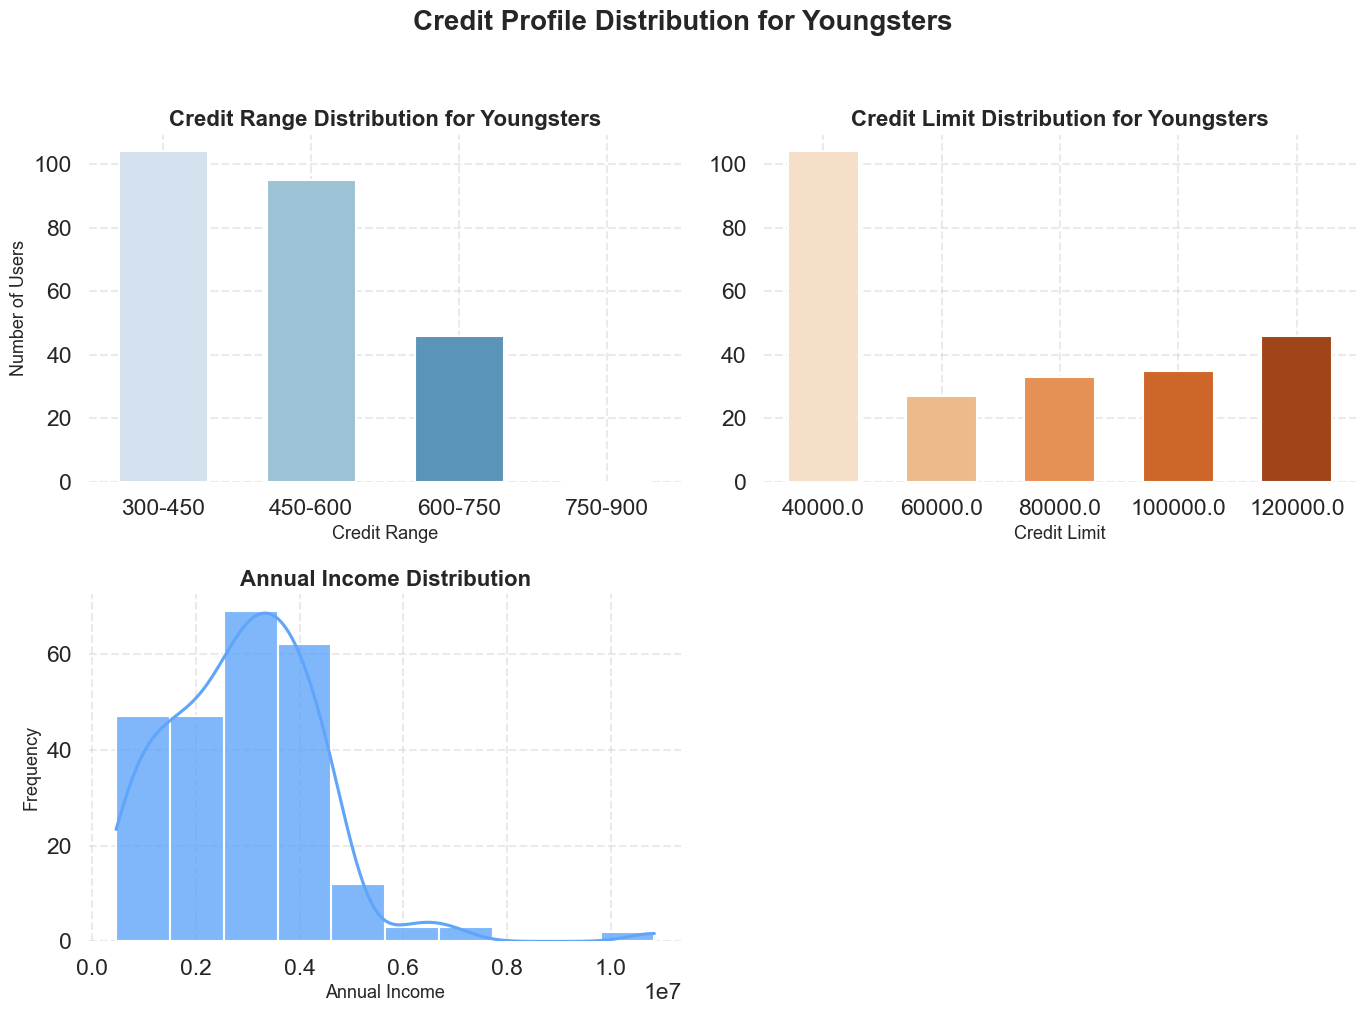

In [105]:
# Set clean theme
sns.set_theme(style="whitegrid", context="talk")

# Create a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.35)  # space between rows

# --- COLOR PALETTES ---
unique_ranges_A = df_youngsters_cp_bar_CR['credit_range'].nunique()
unique_ranges_B = df_youngsters_cp_bar_CL['credit_limit'].nunique()
palette_A = sns.color_palette("Blues", n_colors=unique_ranges_A)
palette_B = sns.color_palette("Oranges", n_colors=unique_ranges_B)

# =======================
#   ROW 1 — BAR CHARTS
# =======================

# --- LEFT BAR PLOT ---
sns.barplot(
    data=df_youngsters_cp_bar_CR,
    x='credit_range',
    y='count',
    hue='credit_range',
    dodge=False,
    palette=palette_A,
    legend=False,
    ax=axes[0, 0],
    width=0.6,
    edgecolor='white'
)
axes[0, 0].set_title("Credit Range Distribution for Youngsters", fontsize=16, weight='bold')
axes[0, 0].set_xlabel("Credit Range", fontsize=13)
axes[0, 0].set_ylabel("Number of Users", fontsize=13)
axes[0, 0].grid(True, linestyle='--', alpha=0.4)
sns.despine(ax=axes[0, 0], left=True, bottom=True)

# --- RIGHT BAR PLOT ---
sns.barplot(
    data=df_youngsters_cp_bar_CL,
    x='credit_limit',
    y='count',
    hue='credit_limit',
    dodge=False,
    palette=palette_B,
    legend=False,
    ax=axes[0, 1],
    width=0.6,
    edgecolor='white'
)
axes[0, 1].set_title("Credit Limit Distribution for Youngsters", fontsize=16, weight='bold')
axes[0, 1].set_xlabel("Credit Limit", fontsize=13)
axes[0, 1].set_ylabel("")
axes[0, 1].grid(True, linestyle='--', alpha=0.4)
sns.despine(ax=axes[0, 1], left=True, bottom=True)

# =======================
#   ROW 2 — HISTOGRAMS
# =======================

# --- LEFT HISTOGRAM (Credit Score) ---
sns.histplot(
    data=df_youngsters_cp,
    x='annual_income',
    bins=10,
    kde = True,
    color="#60a5fa",
    alpha=0.8,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Annual Income Distribution", fontsize=16, weight='bold')
axes[1, 0].set_xlabel("Annual Income", fontsize=13)
axes[1, 0].set_ylabel("Frequency", fontsize=13)
axes[1, 0].grid(True, linestyle='--', alpha=0.4)
sns.despine(ax=axes[1, 0], left=True, bottom=True)

axes[1, 1].axis("off")

# Common title
plt.suptitle("Credit Profile Distribution for Youngsters", fontsize=20, weight='bold', y=1.02)

plt.tight_layout()
plt.show()

<h1 style="color:#1f77b4">💳 Credit Profile Distribution for Youngsters</h1>

---

### 1️⃣ Credit Range: <span style="color:#2ca02c">Early Credit Builders</span>

The majority of youngsters sit between **300–600**, signaling they’re just beginning their credit journey — either with **no credit history or a short one**.  
Only a small segment (around **15–20%**) is in the **600+ range**, meaning very few have mature credit profiles.

💡 **Why it matters:**  
This is our **prime opportunity zone**.  
By creating a product that welcomes individuals with limited credit history, we position ourselves as their **first trusted credit partner**.  
This builds **emotional loyalty early** — when these users’ income and spending power grow, we’ll already be their preferred issuer.

---

### 2️⃣ Annual Income: <span style="color:#ff7f0e">The Realistic Threshold</span>

The annual income curve peaks between **₹2.5L – ₹5L**, typical for **fresh graduates or early professionals**.

💡 **Decision:**  
Set eligibility from **₹2.4L annual income (₹20K/month)** — inclusive enough for **college grads and entry-level employees**.  
The goal is **accessibility, not exclusivity**.

💼 **Business Impact:**  
- Expands our **entry funnel** by capturing aspirational users early.  
- Enables **lifetime value growth** — as their income rises, we can upsell premium variants.  
- Builds **goodwill** by offering financial inclusion where traditional banks often decline.

---

### 3️⃣ Credit Limit — <span style="color:#d62728">A Dynamic Growth Opportunity</span>

The data shows that most youngsters currently operate within **low credit limits (₹40,000)**.  
This highlights two challenges:

- Banks’ **cautious stance** due to low credit confidence.  
- Users’ **frustration** from small limits that don’t match lifestyle aspirations.

⏩ **Next Step:**  
Now that we understand their **credit profile and income range**, the logical next step is to design a **tiered credit limit model** based on **credit score brackets**.

This approach will help us align user potential with risk management — paving the way for **smart, scalable credit growth.**


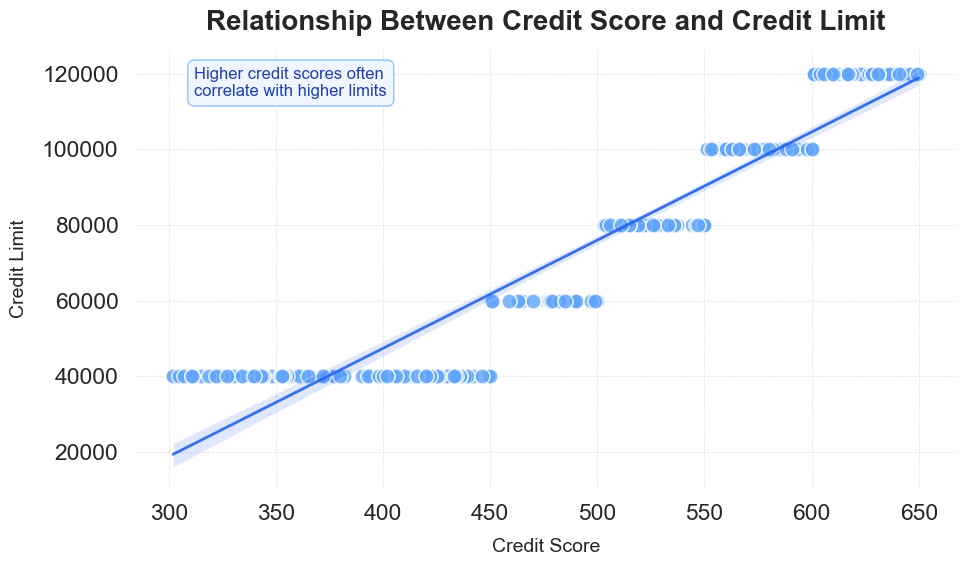

In [106]:
# Aesthetic style
sns.set_theme(style="whitegrid", context="talk")

# Create figure
plt.figure(figsize=(10, 6))

# Pretty scatterplot
sns.scatterplot(
    data=df_youngsters_cp,
    x='credit_score',
    y='credit_limit',
    color="#60a5fa",          # soft sky blue
    s=120,                    # slightly larger points
    alpha=0.8,                # smooth transparency
    edgecolor="white",        # clean white border
    linewidth=1.2
)

# Add subtle trendline (optional but looks clean)
sns.regplot(
    data=df_youngsters_cp,
    x='credit_score',
    y='credit_limit',
    scatter=False,
    color="#2563eb",          # deep blue
    line_kws={"linewidth": 2, "alpha": 0.9}
)

# Titles and labels
plt.title("Relationship Between Credit Score and Credit Limit", fontsize=20, weight='bold', pad=15)
plt.xlabel("Credit Score", fontsize=14, labelpad=10)
plt.ylabel("Credit Limit", fontsize=14, labelpad=10)

# Style tweaks
plt.grid(True, which='major', linestyle='--', linewidth=0.6, alpha=0.5)
sns.despine(left=True, bottom=True)

# Annotation (optional)
plt.text(
    df_youngsters_cp['credit_score'].min() + 10,
    df_youngsters_cp['credit_limit'].max() * 0.95,
    "Higher credit scores often\ncorrelate with higher limits",
    fontsize=12,
    color="#1e40af",
    bbox=dict(boxstyle="round,pad=0.4", fc="#eff6ff", ec="#93c5fd", lw=1)
)

plt.tight_layout()
plt.show()


<h1 style="color:#1f77b4">💳 Insight: Credit Score vs Credit Limit</h1>

---

### 📊 Data Insight

The scatter plot shows **distinct clusters**, where **higher credit scores** consistently align with **higher credit limits**.  
This indicates a **natural segmentation** of users by financial maturity and repayment capability.

---

### 🧠 Business Logic: <span style="color:#2ca02c">Tiered Credit Limit Design</span>

We can leverage these clusters to design a **tiered credit limit structure** that balances  
**risk control** with **growth opportunity** — rewarding responsible usage while protecting against defaults.

| Tier | Credit Score | Limit Range | Rationale |
| :-- | :--: | :--: | :-- |
| **Tier 1 – Explorer** | 300–450 | ₹40K | New-to-credit, low exposure to minimize risk |
| **Tier 2 – Builder** | 451–550 | ₹60K | Improving users, reward responsible usage |
| **Tier 3 – Achiever** | 551–650 | ₹80K | Near-prime users, ready for gradual upgrades |

---

### 💼 Why It Works

- **📈 Data-backed:** Mirrors the natural credit–limit clusters from our analysis.  
- **🛡️ Low-risk entry:** Keeps exposure controlled for high-risk users.  
- **🚀 Growth-driven:** Encourages users to improve credit behavior and “level up.”  

---

This **tiered approach** ensures **financial prudence** while deepening **brand trust and loyalty** among our target youth segment —  
laying the foundation for **long-term customer growth** and **portfolio stability**.


In [107]:
df_all_young = df_all.groupby('age_group', observed=False).get_group('Youngsters')
df_all_young.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range,tran_id,tran_date,tran_amount,platform,product_category,payment_type
1008,3,Kriti Mangal,Male,21,City,Freelancer,1790240.0,Married,Youngsters,544,...,41040.0,4.0,80000.0,500-550,42,2023-01-01,4800,Cred,Kitchen Appliances,Phonepe
1009,3,Kriti Mangal,Male,21,City,Freelancer,1790240.0,Married,Youngsters,544,...,41040.0,4.0,80000.0,500-550,976,2023-01-01,5760,Amazon,Electronics,Gpay
1010,3,Kriti Mangal,Male,21,City,Freelancer,1790240.0,Married,Youngsters,544,...,41040.0,4.0,80000.0,500-550,2320,2023-01-02,5760,Flipkart,Electronics,Phonepe
1011,3,Kriti Mangal,Male,21,City,Freelancer,1790240.0,Married,Youngsters,544,...,41040.0,4.0,80000.0,500-550,2715,2023-01-02,6640,Amazon,Fashion & Apparel,Gpay
1012,3,Kriti Mangal,Male,21,City,Freelancer,1790240.0,Married,Youngsters,544,...,41040.0,4.0,80000.0,500-550,3736,2023-01-02,4400,Shopify,Fashion & Apparel,Gpay


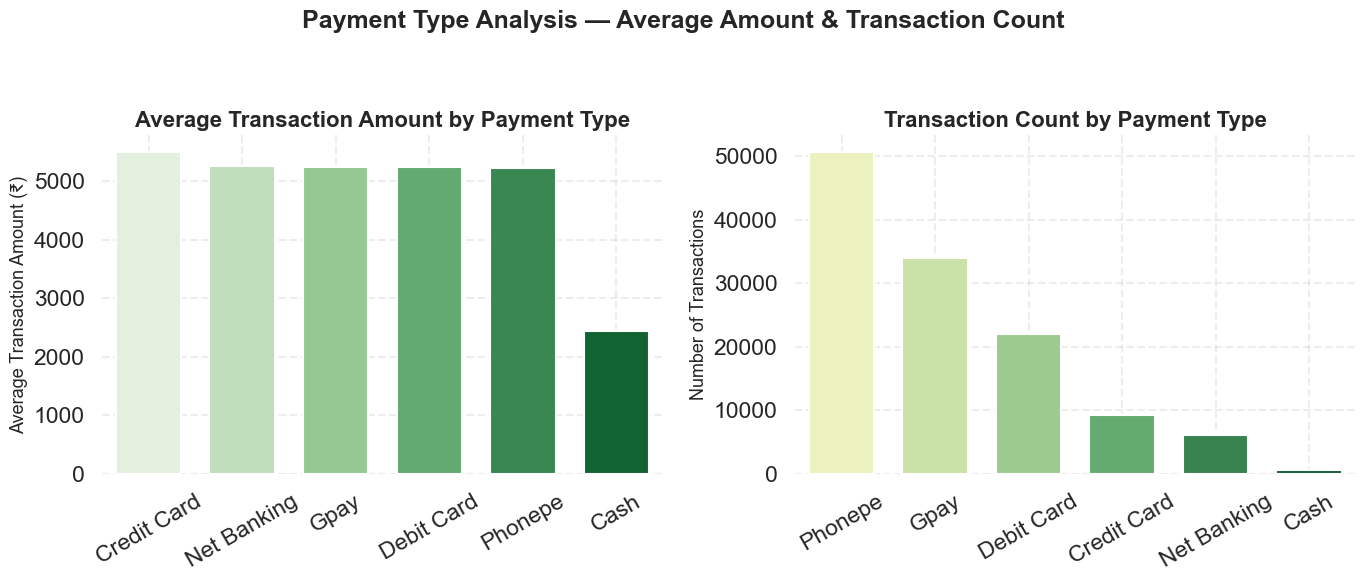

In [108]:
sns.set_theme(style="whitegrid", context="talk")

# --- Compute metrics ---
# 1️⃣ Average transaction amount by payment type
avg_payment = (
    df_all_young.groupby('payment_type')['tran_amount']
    .mean()
    .reset_index()
    .sort_values('tran_amount', ascending=False)
)
avg_payment['tran_amount'] = avg_payment['tran_amount'].round(1)

# 2️⃣ Transaction count by payment type
count_payment = (
    df_all_young['payment_type']
    .value_counts()
    .reset_index()
)
count_payment.columns = ['payment_type', 'count']

# --- Palettes ---
palette_avg = sns.color_palette("Greens", n_colors=len(avg_payment))
palette_count = sns.color_palette("YlGn", n_colors=len(count_payment))

# --- Create figure with 2 subplots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ===== LEFT: Average Transaction Amount =====
sns.barplot(
    data=avg_payment,
    x='payment_type', y='tran_amount',
    hue='payment_type', palette=palette_avg,
    dodge=False, legend=False,
    edgecolor='white', width=0.7, ax=ax1
)
ax1.set_title("Average Transaction Amount by Payment Type", fontsize=16, weight='bold')
ax1.set_xlabel("")
ax1.set_ylabel("Average Transaction Amount (₹)", fontsize=13)
ax1.grid(True, linestyle='--', alpha=0.35)
sns.despine(ax=ax1, left=True, bottom=True)
ax1.tick_params(axis='x', rotation=30)

# ===== RIGHT: Transaction Count =====
sns.barplot(
    data=count_payment,
    x='payment_type', y='count',
    hue='payment_type', palette=palette_count,
    dodge=False, legend=False,
    edgecolor='white', width=0.7, ax=ax2
)
ax2.set_title("Transaction Count by Payment Type", fontsize=16, weight='bold')
ax2.set_xlabel("")
ax2.set_ylabel("Number of Transactions", fontsize=13)
ax2.grid(True, linestyle='--', alpha=0.35)
sns.despine(ax=ax2, left=True, bottom=True)
ax2.tick_params(axis='x', rotation=30)

# --- Layout and spacing ---
fig.suptitle("Payment Type Analysis — Average Amount & Transaction Count", 
             fontsize=18, weight='bold', y=0.98)
plt.subplots_adjust(top=0.90, wspace=0.35, left=0.07, right=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


<h1 style="color:#1f77b4">💸 Payment Type Analysis — Average Amount & Transaction Count</h1>

---

### 📊 Key Insights

The analysis reveals a **divergence between transaction value and frequency** across payment modes:

- **Credit Cards** show the **highest average transaction amount (₹5000–₹5500)**, indicating they’re used for **planned or higher-value purchases**.  
- **UPI platforms (PhonePe, GPay)** dominate in **transaction count**, together forming over **70% of total transactions** — showing their role in **everyday low-value payments**.  
- **Debit Cards and Net Banking** occupy the middle ground — moderate in both value and volume, hinting at **occasional, familiar-use behavior**.  
- **Cash** is nearly negligible, reinforcing the shift toward **digital-first spending habits**.

---

### 🧠 What This Says About Our Target Group

Our focus segment — **young earners and first-time credit users** — shows a **clear digital preference**:

- They **trust UPI** for small, instant payments due to its simplicity and mobile-first experience.  
- They **avoid traditional banking friction**, preferring **speed and convenience** over legacy systems.  
- While they use **credit cards less frequently**, the **average spend is higher**, indicating **aspiration-led usage** — they pull out credit when it *feels premium or necessary*.


---

### 💡 Strategic Proposal: <span style="color:#2ca02c">Introducing the “Rupey Credit Card”</span>

To align with these behavioral insights, we propose a **hybrid, frictionless credit experience** —  
**The Rupey Credit Card** — where **credit meets UPI convenience.**

#### 🔧 Key Features:
- **UPI Integration:** Users can **link the Rupey Card to UPI apps** (GPay, PhonePe, Paytm) — enabling tap-to-pay or scan-to-pay via credit.  
- **Instant Digital Onboarding:** Entire **application and activation online**, removing paperwork and wait time.  

#### 💼 Expected Impact:
- **Higher Adoption:** Converts heavy UPI users into credit users seamlessly.  
- **Increased Stickiness:** Combines **the habit of UPI** with **the power of credit**.  
- **Financial Inclusion:** Simplifies credit access for **young, digitally active** individuals.  

---

✨ **In short:**  
The data tells a simple story — **UPI is habit, credit is aspiration.**  
The Rupey Credit Card unites them — making credit **as easy and habitual as a UPI tap.**


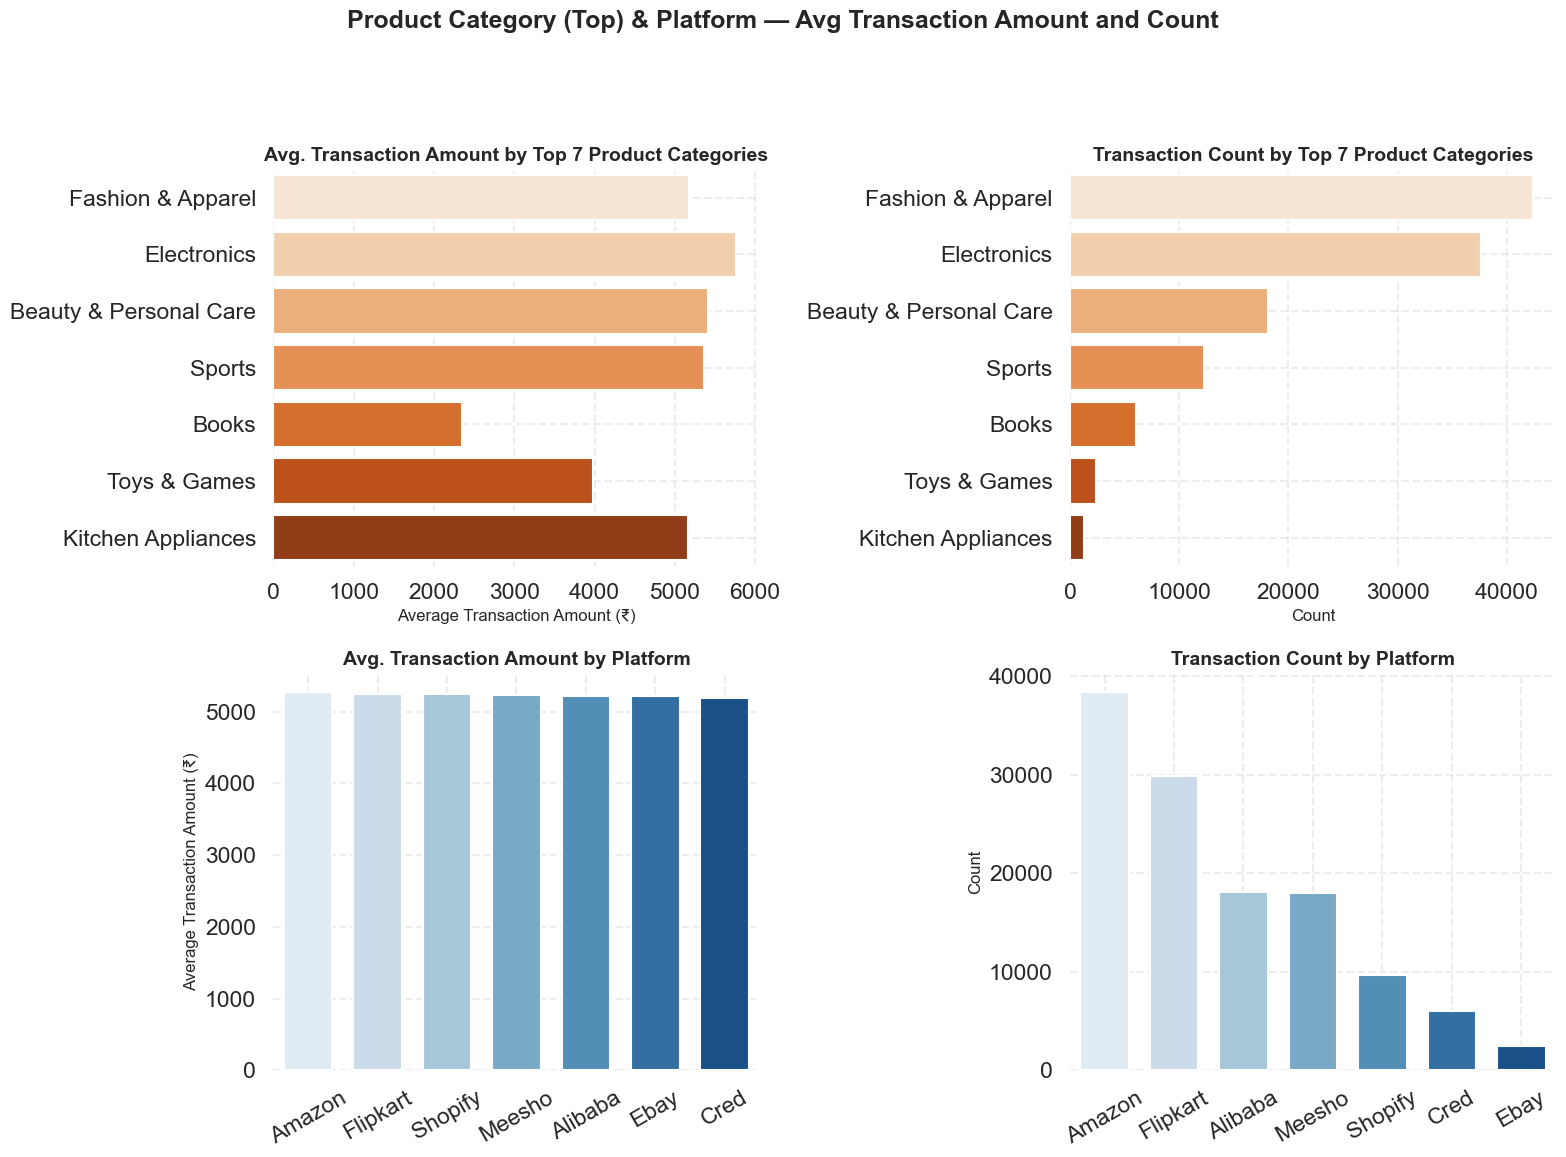

In [109]:
sns.set_theme(style="whitegrid", context="talk")

# === Parameters ===
TOP_N = 7   # change this to show more/less product categories

# === Prepare data ===
# Product category (top N)
prod_counts = df_all_young['product_category'].value_counts().nlargest(TOP_N).reset_index()
prod_counts.columns = ['product_category', 'count']

prod_avg = (
    df_all_young.groupby('product_category')['tran_amount']
    .mean()
    .reset_index()
    .loc[lambda d: d['product_category'].isin(prod_counts['product_category'])]
)
prod_avg = prod_avg.set_index('product_category').loc[prod_counts['product_category']].reset_index()
prod_avg['tran_amount'] = prod_avg['tran_amount'].round(1)

# Platform (all)
plat_counts = df_all_young['platform'].value_counts().reset_index()
plat_counts.columns = ['platform', 'count']

plat_avg = (
    df_all_young.groupby('platform')['tran_amount']
    .mean()
    .reset_index()
    .sort_values('tran_amount', ascending=False)
)
plat_avg['tran_amount'] = plat_avg['tran_amount'].round(1)

# === Palettes ===
palette_prod = sns.color_palette("Oranges", n_colors=len(prod_counts))
palette_prod_pal = palette_prod  # horizontal product palettes

palette_plat = sns.color_palette("Blues", n_colors=len(plat_counts))

# === Figure with 2 rows x 2 cols ===
fig, axes = plt.subplots(2, 2, figsize=(16, 12),
                         gridspec_kw={"height_ratios": [1, 1], "width_ratios":[1,1]})

# -------- Row 1: PRODUCT CATEGORY (horizontal bars) --------
ax_p_avg = axes[0, 0]
sns.barplot(
    data=prod_avg,
    y='product_category', x='tran_amount',
    hue='product_category', palette=palette_prod_pal,
    dodge=False, legend=False, edgecolor='white',
    ax=ax_p_avg, orient='h'
)
ax_p_avg.set_title(f"Avg. Transaction Amount by Top {TOP_N} Product Categories", fontsize=14, weight='bold')
ax_p_avg.set_xlabel("Average Transaction Amount (₹)", fontsize=12)
ax_p_avg.set_ylabel("")
ax_p_avg.grid(True, linestyle='--', alpha=0.35)
sns.despine(ax=ax_p_avg, left=True, bottom=True)
ax_p_avg.tick_params(axis='y', rotation=0)

# --- Right: product counts (horizontal) ---
ax_p_cnt = axes[0, 1]
sns.barplot(
    data=prod_counts,
    y='product_category', x='count',
    hue='product_category', palette=palette_prod_pal,
    dodge=False, legend=False, edgecolor='white',
    ax=ax_p_cnt, orient='h'
)
ax_p_cnt.set_title(f"Transaction Count by Top {TOP_N} Product Categories", fontsize=14, weight='bold')
ax_p_cnt.set_xlabel("Count", fontsize=12)
ax_p_cnt.set_ylabel("")
ax_p_cnt.grid(True, linestyle='--', alpha=0.35)
sns.despine(ax=ax_p_cnt, left=True, bottom=True)
ax_p_cnt.tick_params(axis='y', rotation=0)

# -------- Row 2: PLATFORM (vertical bars) --------
ax_plat_avg = axes[1, 0]
sns.barplot(
    data=plat_avg,
    x='platform', y='tran_amount',
    hue='platform', palette=palette_plat,
    dodge=False, legend=False, edgecolor='white',
    ax=ax_plat_avg, width=0.7
)
ax_plat_avg.set_title("Avg. Transaction Amount by Platform", fontsize=14, weight='bold')
ax_plat_avg.set_xlabel("")
ax_plat_avg.set_ylabel("Average Transaction Amount (₹)", fontsize=12)
ax_plat_avg.grid(True, linestyle='--', alpha=0.35)
sns.despine(ax=ax_plat_avg, left=True, bottom=True)
ax_plat_avg.tick_params(axis='x', rotation=30)

# --- Right: platform counts (vertical) ---
ax_plat_cnt = axes[1, 1]
sns.barplot(
    data=plat_counts,
    x='platform', y='count',
    hue='platform', palette=palette_plat,
    dodge=False, legend=False, edgecolor='white',
    ax=ax_plat_cnt, width=0.7
)
ax_plat_cnt.set_title("Transaction Count by Platform", fontsize=14, weight='bold')
ax_plat_cnt.set_xlabel("")
ax_plat_cnt.set_ylabel("Count", fontsize=12)
ax_plat_cnt.grid(True, linestyle='--', alpha=0.35)
sns.despine(ax=ax_plat_cnt, left=True, bottom=True)
ax_plat_cnt.tick_params(axis='x', rotation=30)

# === Layout adjustments ===
fig.suptitle("Product Category (Top) & Platform — Avg Transaction Amount and Count", fontsize=18, weight='bold', y=0.97)
plt.subplots_adjust(top=0.90, hspace=0.45, wspace=0.35, left=0.07, right=0.96)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


<h1 style="color:#1f77b4">🛍️ Product Category & Platform Analysis</h1>

---

### 📊 **Professional Insights**

#### 🧾 Product Categories

- **Fashion & Apparel** leads in **transaction count**, showing **frequent, low-ticket purchases** — ideal for daily or impulse buys.  
- **Electronics** drives the **highest average spend**, suggesting **big-ticket but less frequent** transactions.  
- **Beauty & Personal Care** and **Sports** maintain **balanced spend and frequency**, reflecting **lifestyle-driven consistency**.

#### 💻 Platforms

- **Amazon** and **Flipkart** dominate transaction volume — the **top choices for young online shoppers**.  
- **Meesho** and **Shopify** show moderate activity, fueled by **budget-conscious** and **small-brand** preferences.  
- **Average spend** remains steady across platforms (~₹5000–₹5500), indicating **stable online purchasing habits**.

---

### 👥 **User Behavior — Insights on Young Shoppers**

These trends reflect the **digital-first habits** of our target group:

- Youngsters are **highly active online**, focusing spending on **fashion, lifestyle, and personal care**.  
- Their purchases are **high in frequency but low in value**, emphasizing **convenience and affordability**.    

💬 **Implication:**  
Our credit offering must **integrate into their lifestyle**, not compete with high-end premium cards. It should feel **friendly, quick, and rewarding** — just like their favorite shopping apps.

---

<h1 style="color:#1f77b4">💡 Proposed Solution — “Rupey Cashback Credit Card”</h1>

---

### 🪙 **Concept Overview**

A **digital-first cashback credit card** designed to **convert everyday digital spenders into confident credit users**  
by **rewarding their existing habits** and **guiding smarter credit adoption**.

---

### 🔧 **Key Features**

#### 💰 **1️⃣ 5% Cashback on Top Platforms (Amazon & Flipkart)**

Since **Amazon and Flipkart** show the **highest transaction volumes**, offering **5% cashback** will:

- Encourage users to **use the credit card where they already spend most**.  
- Build a **consistent card usage habit** among young online shoppers.  
- Create **early satisfaction** through visible, frequent cashback gains — fueling repeat engagement.  

💬 *Insight Link:*  
This directly capitalizes on high e-commerce engagement revealed in platform data.

---

#### ⚡ **2️⃣ No-Cost EMI for High-Value Categories (Electronics)**

**Electronics** drives the **highest average spend**, signaling comfort with large online purchases.  

- Offering **no-cost EMI** on electronics purchases positions Rupey as the **go-to card for big-ticket buys**.  
- Merges **affordability and aspiration** — a winning formula for India’s tech-savvy youth.  
- Builds trust through transparent, flexible repayment options.

💬 *Insight Link:*  
Connects to the segment’s preference for *experience-driven yet cautious spending.*

---

#### 🎯 **3️⃣ Reward Points for Everyday UPI Transactions**

UPI is the **most habitual payment behavior** for our target group.  
To shift them smoothly toward credit-based usage, Rupey will:

- Allow users to **link their credit card to UPI apps** (PhonePe, GPay, Paytm).  
- Provide **reward points per UPI transaction**, redeemable for cashback or vouchers.  
- Offer **instant gratification**, making Rupey part of their **daily digital routine**.  

💬 *Insight Link:*  
Transforms UPI from a convenience tool into a **credit engagement channel**.

---

### 💼 **Why This Works**

- **📊 Behavior-Backed:** Rewards are designed around **where and how users already spend**.  
- **🔁 Habit-Forming:** Frequent, small cashbacks reinforce **daily credit comfort**.  
- **💎 Retention-Focused:** Real, tangible value keeps users **engaged beyond the first swipe**.  


  <br></br>
<h1 style="color:#1f77b4", align = 'center'>🏁 Final Summary — Rupey Credit Card Strategy</h1>

---

### 🎯 **Target Customer**

**Youngsters aged 20–30**, early in their careers, often with **limited or no credit history**.  
They are **digitally active**, **UPI-savvy**, and seek **convenience, flexibility, and rewards** in their financial tools.

---

### 💳 **Credit Profile of Target Group**

| Attribute | Description |
| :-- | :-- |
| **Credit Score** | No or Low Credit Score (300–650) |
| **Annual Income** | ₹2.5 Lakhs and above |
| **Spending Behavior** | Frequent online transactions — primarily e-commerce and UPI |
| **Mindset** | Experience-driven, not luxury-driven — prefers instant value and ease of use |

---

### 🧩 **Tiered Credit Limit Framework**

| Tier | Credit Score | Limit Range | Rationale |
| :-- | :--: | :--: | :-- |
| **Tier 1 – Explorer** | 300–450 | ₹40K | New-to-credit, low exposure to minimize risk |
| **Tier 2 – Builder** | 451–550 | ₹60K | Improving users, reward responsible usage |
| **Tier 3 – Achiever** | 551–650 | ₹80K | Near-prime users, ready for gradual upgrades |

💬 *Insight Link:*  
This structure balances **risk management** with **growth opportunity**, motivating users to **build better credit behavior** while scaling responsibly.

---

### 💡 **Product Type — “Rupey Cashback Credit Card”**

A **digital-first, UPI-linked cashback credit card** designed for India’s young online generation.

#### 💳 Why RuPay?
- **UPI-native integration** makes it ideal for digital-first users.  
- **Domestic focus** ensures accessibility and affordability.  
- **Supports instant onboarding and mobile-first payments.**

#### 💵 Why Cashback?
Because data shows our audience spends mainly on **e-commerce and UPI platforms** —  
they value **tangible, frequent rewards** over aspirational perks.

---

### 🔧 **Key Features**

1️⃣ **5% Cashback** on top e-commerce platforms — **Amazon & Flipkart**  
 → Builds consistent usage where they already shop.  

2️⃣ **No-Cost EMI** for high-value categories — **Electronics**  
 → Encourages adoption for larger, planned purchases.  

3️⃣ **Reward Points** for everyday **UPI transactions**  
 → Converts daily payment habits into active credit engagement.  
